<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Transform-data-set-and-filter-floor-points" data-toc-modified-id="Transform-data-set-and-filter-floor-points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Transform data set and filter floor points</a></span></li><li><span><a href="#Extract-Ground-Truth" data-toc-modified-id="Extract-Ground-Truth-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract Ground Truth</a></span><ul class="toc-item"><li><span><a href="#A)-By-knowing-distance-at-which-dataset-was-measured" data-toc-modified-id="A)-By-knowing-distance-at-which-dataset-was-measured-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A) By knowing distance at which dataset was measured</a></span></li><li><span><a href="#B)-Via-DROW-Detector" data-toc-modified-id="B)-Via-DROW-Detector-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>B) Via DROW Detector</a></span><ul class="toc-item"><li><span><a href="#3D-Plot" data-toc-modified-id="3D-Plot-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>3D Plot</a></span></li><li><span><a href="#2D-Plots" data-toc-modified-id="2D-Plots-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>2D Plots</a></span></li></ul></li></ul></li><li><span><a href="#SEGMENTATION---Clustering" data-toc-modified-id="SEGMENTATION---Clustering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SEGMENTATION - Clustering</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>DBSCAN</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Grid Search</a></span></li></ul></li><li><span><a href="#OPTICS" data-toc-modified-id="OPTICS-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>OPTICS</a></span><ul class="toc-item"><li><span><a href="#Reachability-Plots" data-toc-modified-id="Reachability-Plots-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Reachability Plots</a></span></li></ul></li><li><span><a href="#Spectral-Clustering" data-toc-modified-id="Spectral-Clustering-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Spectral Clustering</a></span></li></ul></li><li><span><a href="#Preprocessing---Testing" data-toc-modified-id="Preprocessing---Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing - Testing</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#3D-Plot-using-matplotlib" data-toc-modified-id="3D-Plot-using-matplotlib-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>3D Plot using matplotlib</a></span></li><li><span><a href="#3D-Plot-using-pptk" data-toc-modified-id="3D-Plot-using-pptk-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>3D Plot using pptk</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import time
import collections
import seaborn as sns       

from crowd_tracker_lidar3d.loader import load_data_to_dataframe
from crowd_tracker_lidar3d.plot_tools import plot_pointcloud3d, draw_point_cloud, show_projections
from crowd_tracker_lidar3d.preprocessing import rotate_pcl, df_apply_rot, return_ground_points, remove_ground_points, standardize_data
import matplotlib.pyplot as plt 

In [3]:
walking_dist = 3 

In [4]:
filename = '{}m_1person_labeled-front_lidar-velodyne_points'.format(str(walking_dist))

In [5]:
bag_dir = os.path.dirname(os.path.abspath(''))
bag_dir = os.path.join(bag_dir, "data")
data = load_data_to_dataframe(filename, bag_dir)

In [6]:
# Helper Function to save plots 
def save_fig(fig, filename, extension='.pdf'):
    save_dir = os.getcwd()
    save_dir = os.path.join(save_dir, "../plots/") + str(filename) + extension
    fig.savefig(save_dir, bbox_inches='tight')  

## Data Overview

In [7]:
data.shape

(5703670, 6)

In [8]:
data.head()

rosbagTimestamp         x         y         z  intensity      time
0  1585676291247622519 -1.030228 -0.526967  0.310065        1.0 -0.099263
1  1585676291247622519 -1.063074 -0.539095  0.319383        1.0 -0.099208
2  1585676291247622519 -1.101393 -0.548894  0.329735        1.0 -0.099097
3  1585676291247622519 -1.125818 -0.556170  0.336465        1.0 -0.099042
4  1585676291247622519 -1.178068 -0.576874  0.351476        4.0 -0.098986

In [8]:
# investigate value ranges
x_max, x_min = np.max(data.x), np.min(data.x)
y_max, y_min = np.max(data.y), np.min(data.y)
z_max, z_min = np.max(data.z), np.min(data.z)
intensity_max, intensity_min = np.max(data.intensity), np.min(data.intensity)

print('x_max: {:.3f}, x_min: {:.3f}'.format(x_max, x_min))
print('y_max: {:.3f} y_min: {:.3f}'.format(y_min, y_max))
print('z_max: {:.3f}, z_min: {:.3f}'.format(z_max, z_min))
print('intensity_max: {:.3f}, intensity_min: {:.3f}'.format(intensity_max, intensity_min))
print('\nNumber of points: {}'.format(data.shape[0]))

x_max: 24.621, x_min: -5.045
y_max: -6.891 y_min: 4.699
z_max: 6.225, z_min: -0.526
intensity_max: 148.000, intensity_min: 0.000

Number of points: 5703670


In [9]:
# Number of unique timestamps
timesteps = data.rosbagTimestamp.unique()
len(timesteps)

282

In [10]:
len(data.x.between(2.5,3.5))

5703670

In [11]:
# Analyze pointclouds from first and very last timestamp
start = data[data.rosbagTimestamp == timesteps[0]]
end = data[data.rosbagTimestamp == timesteps[-1]]

In [12]:
print(len(start))
print(len(end))

20079
20346


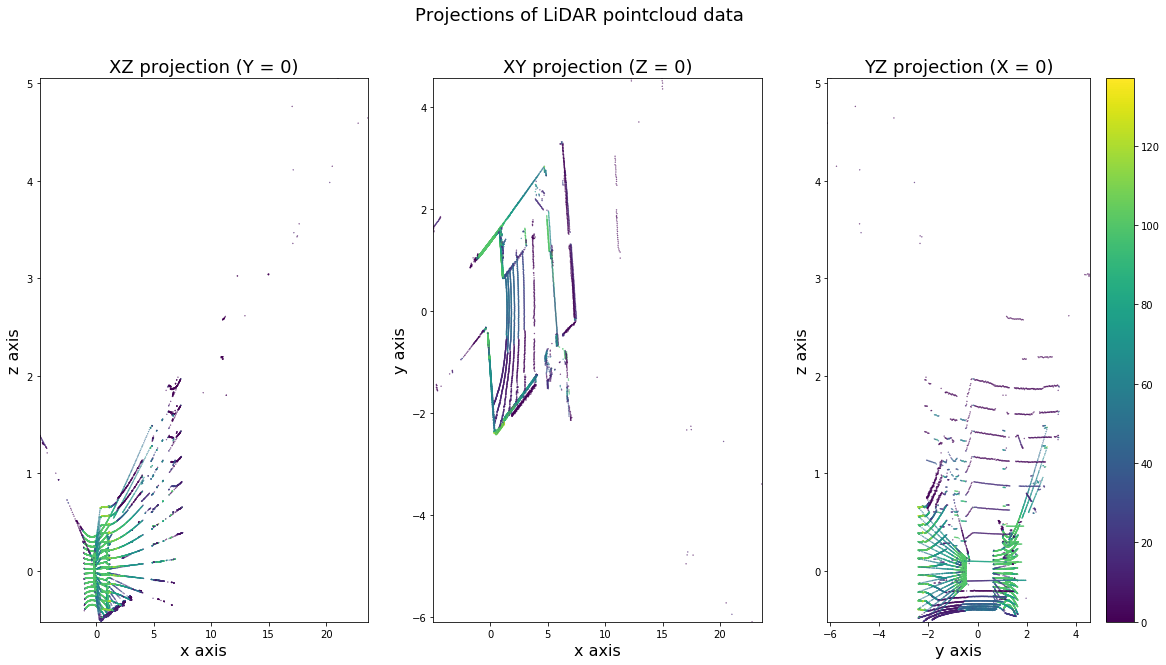

In [14]:
show_projections(start, ['x', 'y', 'z', 'intensity']) #, savefig=True, filename='1m_labeled_raw_timestep0')

## Transform data set and filter floor points

In [15]:
# Set threshold in z-value 
thresh = -0.38

In [16]:
# Rotate points to compensate for LiDAR tilt angle 
start_transformed = df_apply_rot(start)

In [17]:
# Mean difference of z values before and after transformation
np.mean(start_transformed.z - start.z)

-0.11330023590720592

Total number of data points: 20079
Number of data points after filtering for floor points: 15816


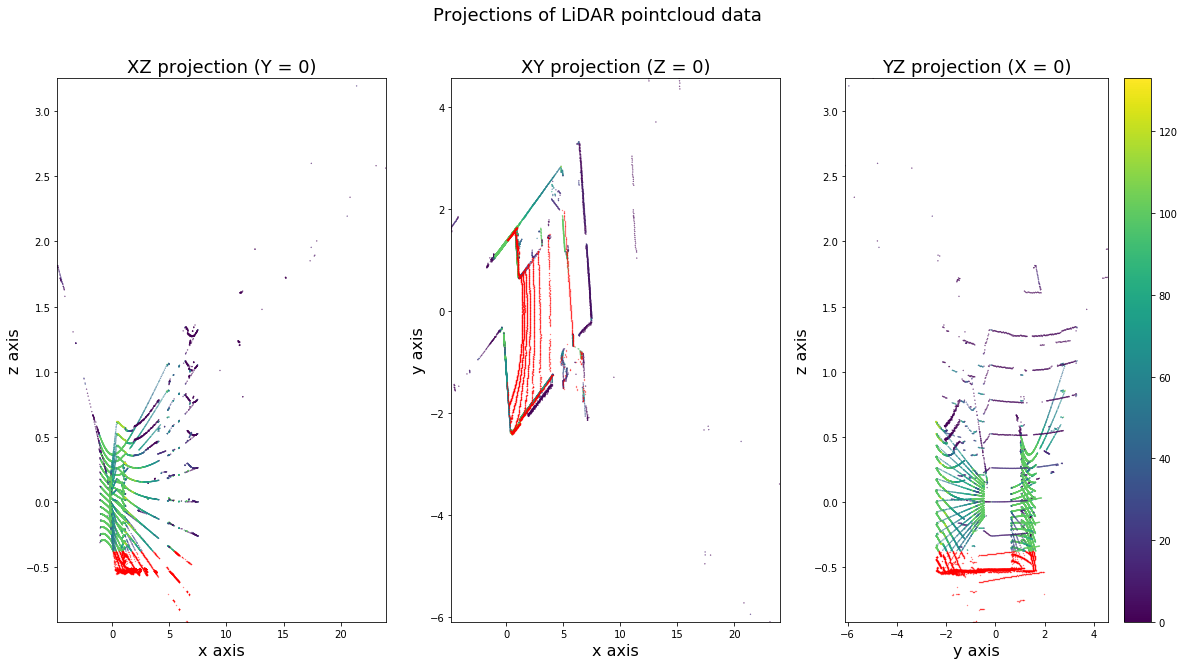

Filtered floor points


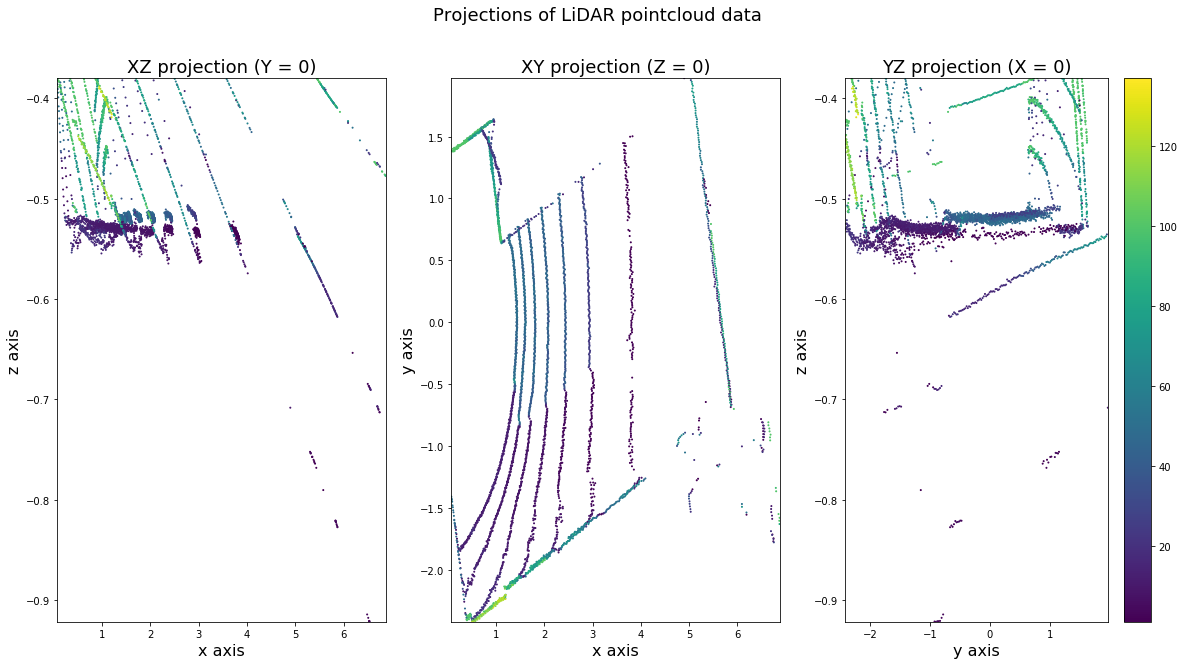

Points selected for segmentation after filtering out floor points


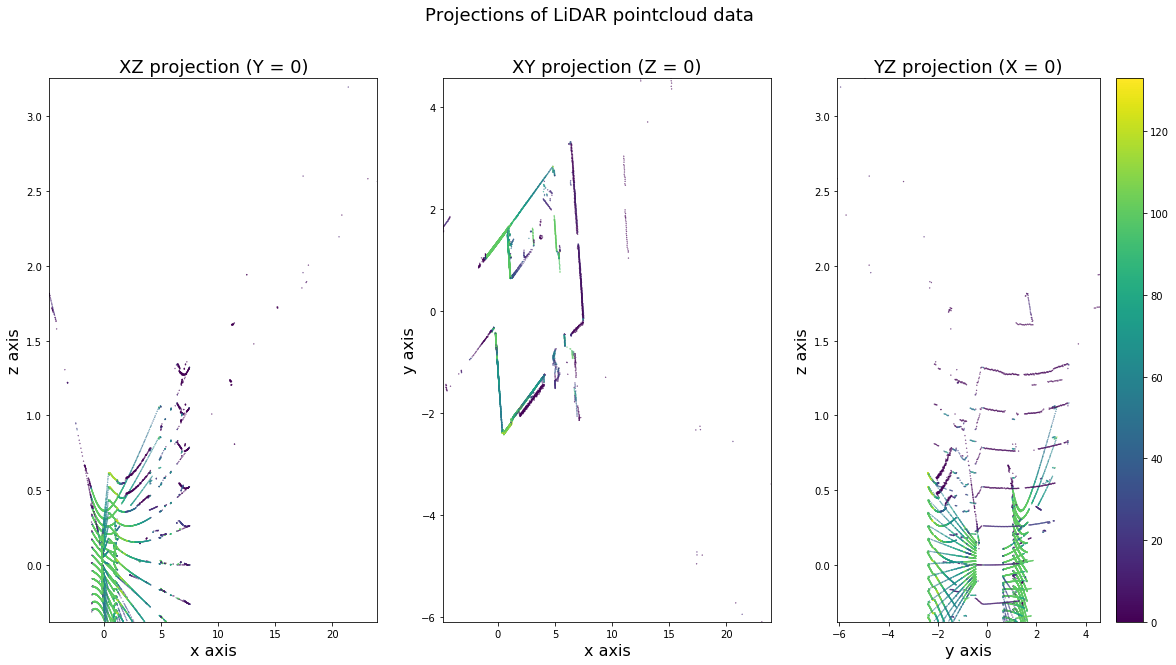

In [19]:
%matplotlib inline
ground_vals_after_rot = return_ground_points(start_transformed, thresh)
start_filtered = remove_ground_points(start_transformed, thresh)
print('Total number of data points: {}\nNumber of data points after filtering for floor points: {}'.format(start_transformed.shape[0], start_filtered.shape[0]))
show_projections(start_filtered, ['x', 'y', 'z', 'intensity'], point_eliminations=ground_vals_after_rot) #, savefig=True, filename='3m_labeled_point_eliminations_rotated_start')
print('Filtered floor points')
show_projections(ground_vals_after_rot, ['x', 'y', 'z', 'intensity']) #, savefig=True, filename='3m_labeled_floorpoints_rotated_start')
print('Points selected for segmentation after filtering out floor points')
show_projections(start_filtered, ['x', 'y', 'z', 'intensity']) #, savefig=True, filename='3m_labeled_data_wo_floor_rotated_start')

## Extract Ground Truth 

### A) By knowing distance at which dataset was measured

In [18]:
# Preprocessing: transform data 
data_transformed = df_apply_rot(data)

In [19]:
np.mean(data_transformed.x - data.x)

0.0024596339959730056

In [20]:
for i, t in enumerate(timesteps):
#     df = data[(data.rosbagTimestamp== t) & (data.x.between(2.5, 3.5))]
    df = data[data.rosbagTimestamp== t]
    ground_truth = df[df.x.between(2.8, 3.5)]
    print('timestep {}: {:.2f} % of points within walking distance, absolute amount: {}'.format(i, 100*float(ground_truth.shape[0])/float(df.shape[0]), ground_truth.shape[0]))

timestep 0: 3.84 % of points within walking distance, absolute amount: 772
timestep 1: 3.86 % of points within walking distance, absolute amount: 775
timestep 2: 3.86 % of points within walking distance, absolute amount: 776
timestep 3: 3.91 % of points within walking distance, absolute amount: 786
timestep 4: 3.89 % of points within walking distance, absolute amount: 781
timestep 5: 3.88 % of points within walking distance, absolute amount: 779
timestep 6: 3.86 % of points within walking distance, absolute amount: 774
timestep 7: 3.88 % of points within walking distance, absolute amount: 779
timestep 8: 3.88 % of points within walking distance, absolute amount: 780
timestep 9: 3.88 % of points within walking distance, absolute amount: 779
timestep 10: 3.86 % of points within walking distance, absolute amount: 774
timestep 11: 3.87 % of points within walking distance, absolute amount: 776
timestep 12: 3.86 % of points within walking distance, absolute amount: 774
timestep 13: 3.87 % of

timestep 121: 4.04 % of points within walking distance, absolute amount: 811
timestep 122: 4.42 % of points within walking distance, absolute amount: 888
timestep 123: 4.80 % of points within walking distance, absolute amount: 964
timestep 124: 4.93 % of points within walking distance, absolute amount: 990
timestep 125: 4.94 % of points within walking distance, absolute amount: 991
timestep 126: 4.98 % of points within walking distance, absolute amount: 997
timestep 127: 4.90 % of points within walking distance, absolute amount: 984
timestep 128: 4.80 % of points within walking distance, absolute amount: 964
timestep 129: 5.00 % of points within walking distance, absolute amount: 1002
timestep 130: 5.20 % of points within walking distance, absolute amount: 1043
timestep 131: 5.24 % of points within walking distance, absolute amount: 1051
timestep 132: 5.28 % of points within walking distance, absolute amount: 1061
timestep 133: 5.17 % of points within walking distance, absolute amount:

timestep 241: 3.92 % of points within walking distance, absolute amount: 785
timestep 242: 3.86 % of points within walking distance, absolute amount: 773
timestep 243: 3.84 % of points within walking distance, absolute amount: 771
timestep 244: 3.86 % of points within walking distance, absolute amount: 775
timestep 245: 3.87 % of points within walking distance, absolute amount: 777
timestep 246: 3.89 % of points within walking distance, absolute amount: 781
timestep 247: 3.86 % of points within walking distance, absolute amount: 775
timestep 248: 3.88 % of points within walking distance, absolute amount: 780
timestep 249: 3.85 % of points within walking distance, absolute amount: 772
timestep 250: 3.87 % of points within walking distance, absolute amount: 776
timestep 251: 3.85 % of points within walking distance, absolute amount: 773
timestep 252: 3.87 % of points within walking distance, absolute amount: 777
timestep 253: 3.84 % of points within walking distance, absolute amount: 773

564
350


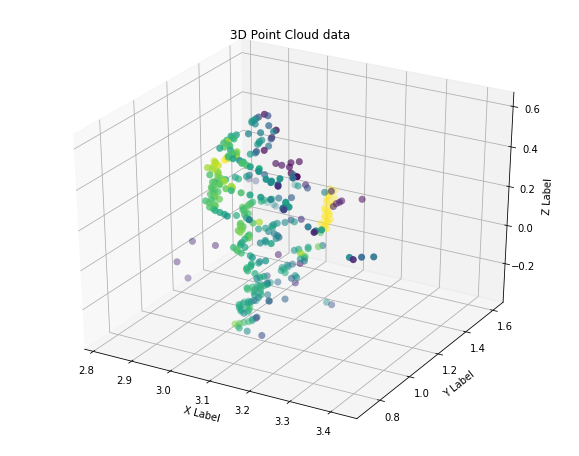

(0.7140030860900879, 1.6117109060287476)


In [68]:
test = data[data.rosbagTimestamp == timesteps[150]].reset_index()
test_trans = df_apply_rot(test)
test_trans = test_trans[(test_trans.x.between(2.8, 3.5)) & (test_trans.y.between(-1, 2))]
print(len(test_trans))
test_trans = remove_ground_points(test_trans, -0.38)
print(len(test_trans))
plot_pointcloud3d(test_trans)
print(np.min(test_trans.y), np.max(test_trans.y))

### B) Via DROW Detector 

In [7]:
det_file = '{}m_1person_labeled-drow_detected_persons'.format(walking_dist)
detections = load_data_to_dataframe(det_file, bag_dir)

In [8]:
detections.head()

rosbagTimestamp  detection_id  confidence     det_x     det_y  det_z  \
0  1585676291995056759           156    0.596226  4.765054 -0.918280    1.0   
1  1585676293500363159           157    0.453330  3.278968 -0.820169    1.0   
2  1585676293606525671           158    0.525579  3.250573 -0.835925    1.0   
3  1585676293834309911           159    0.457082  3.189745 -0.841848    1.0   
4  1585676293932619159           160    0.641975  3.132249 -0.803441    1.0   

   height  
0    1.85  
1    1.85  
2    1.85  
3    1.85  
4    1.85

In [9]:
detections.shape

(119, 7)

In [10]:
print(len(detections.rosbagTimestamp.unique()))
print(len(data.rosbagTimestamp.unique()))

119
282


In [11]:
# Match closest available detection to each timestamp in data 
df_with_detections = data.copy()
df_with_detections = pd.merge_asof(data, detections, on='rosbagTimestamp', direction='forward')

In [12]:
data.shape

(5703670, 6)

In [13]:
df_with_detections.shape

(5703670, 12)

In [14]:
df_with_detections.head()

rosbagTimestamp         x         y         z  intensity      time  \
0  1585676291247622519 -1.030228 -0.526967  0.310065        1.0 -0.099263   
1  1585676291247622519 -1.063074 -0.539095  0.319383        1.0 -0.099208   
2  1585676291247622519 -1.101393 -0.548894  0.329735        1.0 -0.099097   
3  1585676291247622519 -1.125818 -0.556170  0.336465        1.0 -0.099042   
4  1585676291247622519 -1.178068 -0.576874  0.351476        4.0 -0.098986   

   detection_id  confidence     det_x    det_y  det_z  height  
0         156.0    0.596226  4.765054 -0.91828    1.0    1.85  
1         156.0    0.596226  4.765054 -0.91828    1.0    1.85  
2         156.0    0.596226  4.765054 -0.91828    1.0    1.85  
3         156.0    0.596226  4.765054 -0.91828    1.0    1.85  
4         156.0    0.596226  4.765054 -0.91828    1.0    1.85

In [15]:
det_timesteps = df_with_detections.rosbagTimestamp.unique()
print(len(det_timesteps))

282


In [16]:
# Activate interactive plotting mode to be able to zoom in 
%matplotlib notebook


#### 3D Plot 

49


<IPython.core.display.Javascript object>


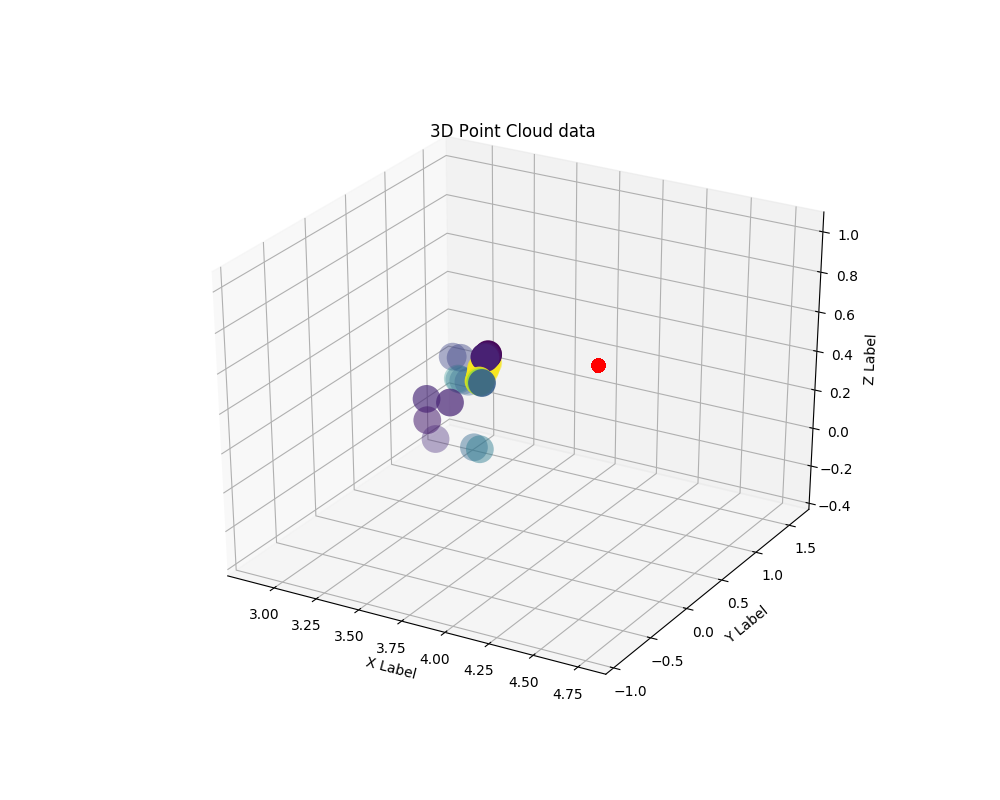

52


<IPython.core.display.Javascript object>


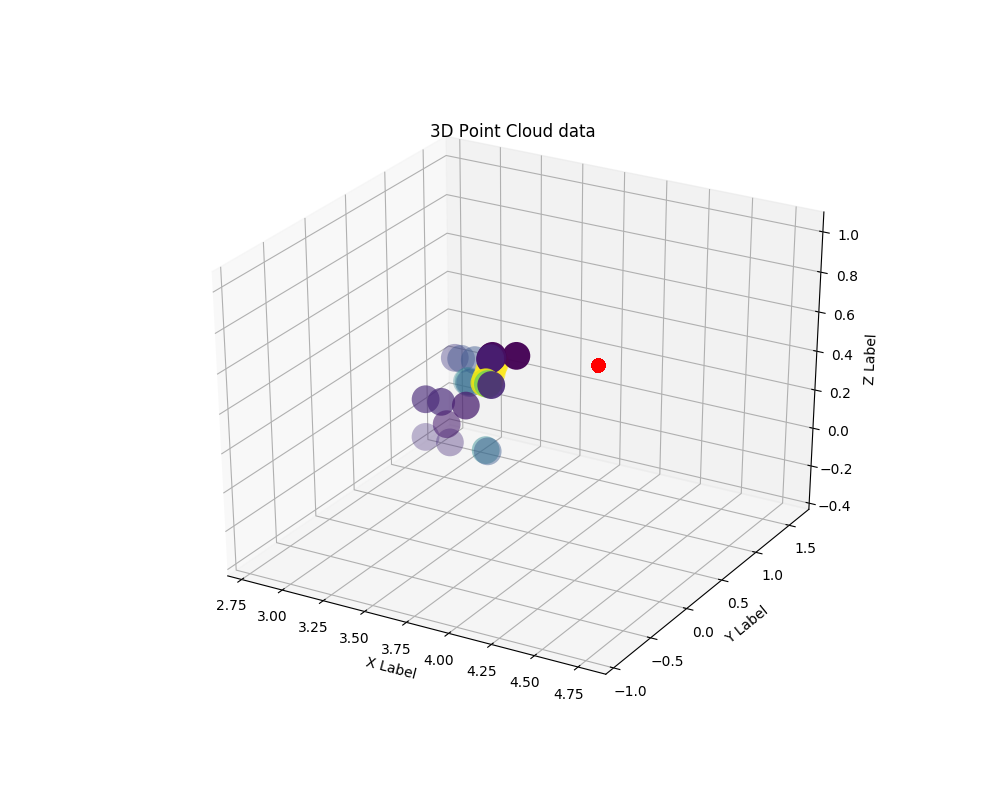

50


<IPython.core.display.Javascript object>


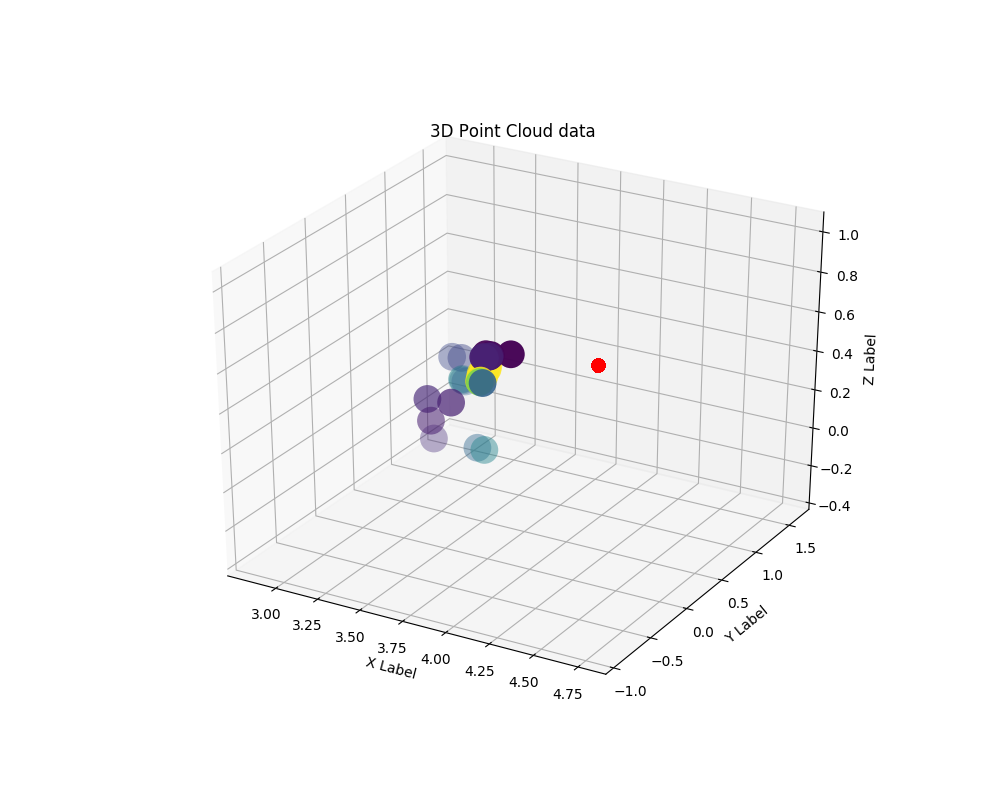

52


<IPython.core.display.Javascript object>


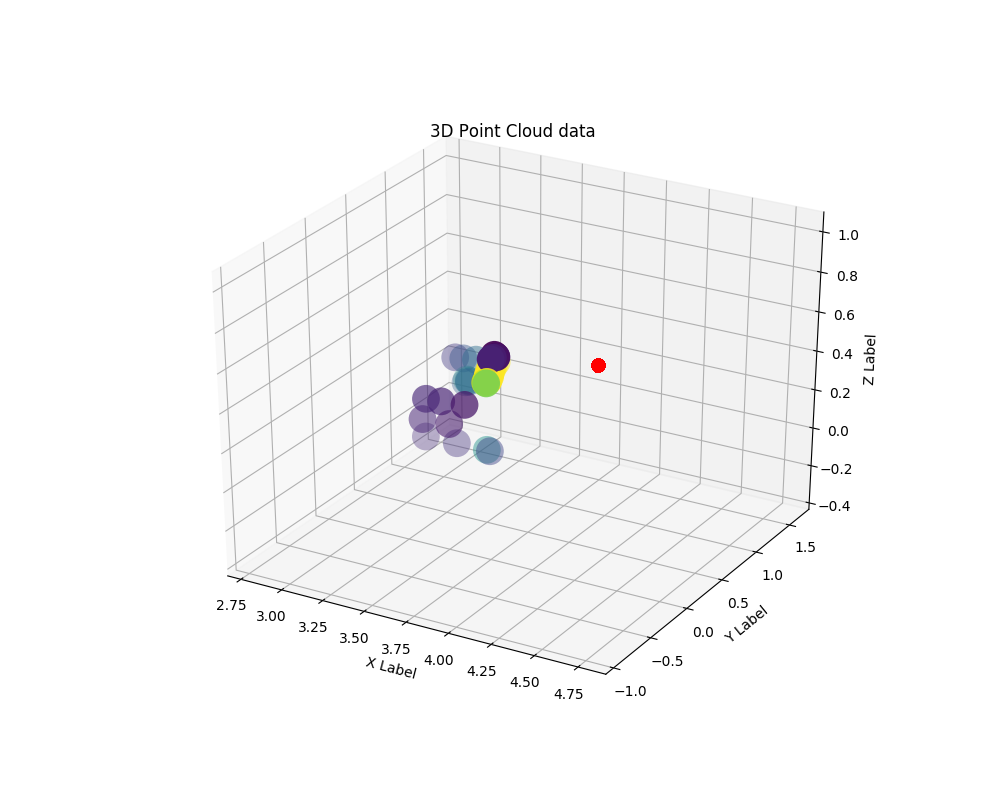

In [32]:
for i,t in enumerate(det_timesteps):
    x = df_with_detections[df_with_detections.rosbagTimestamp == det_timesteps[i]].reset_index()
    x_trans = df_apply_rot(x)
    x_trans = x_trans[(x_trans.x.between(2.8, 3.5)) & (x_trans.y.between(-1, 2))]
    x_trans = remove_ground_points(x_trans, -0.38)
    no_points = x_trans.shape[0]
    point_size = 10**(3- int(np.log10(no_points))) # Adjust point size based on point cloud size
    print(len(x_trans))
    
    
    plt.ion()
    fig = plt.figure(figsize=[10,8])
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_trans['x'], x_trans['y'], x_trans['z'], c=x_trans['intensity'], s=point_size*4, edgecolor='', marker='o')
    ax.scatter(x.det_x, x.det_y, x.det_z, c= 'r', s=point_size*4, edgecolor='', marker='.')
    
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.title('3D Point Cloud data')
    plt.show()
    if i == 3: 
        break

#### 2D Plots

In [34]:
subsample = det_timesteps[::45]

Timestamp: 1585676291247622519
15816


<IPython.core.display.Javascript object>


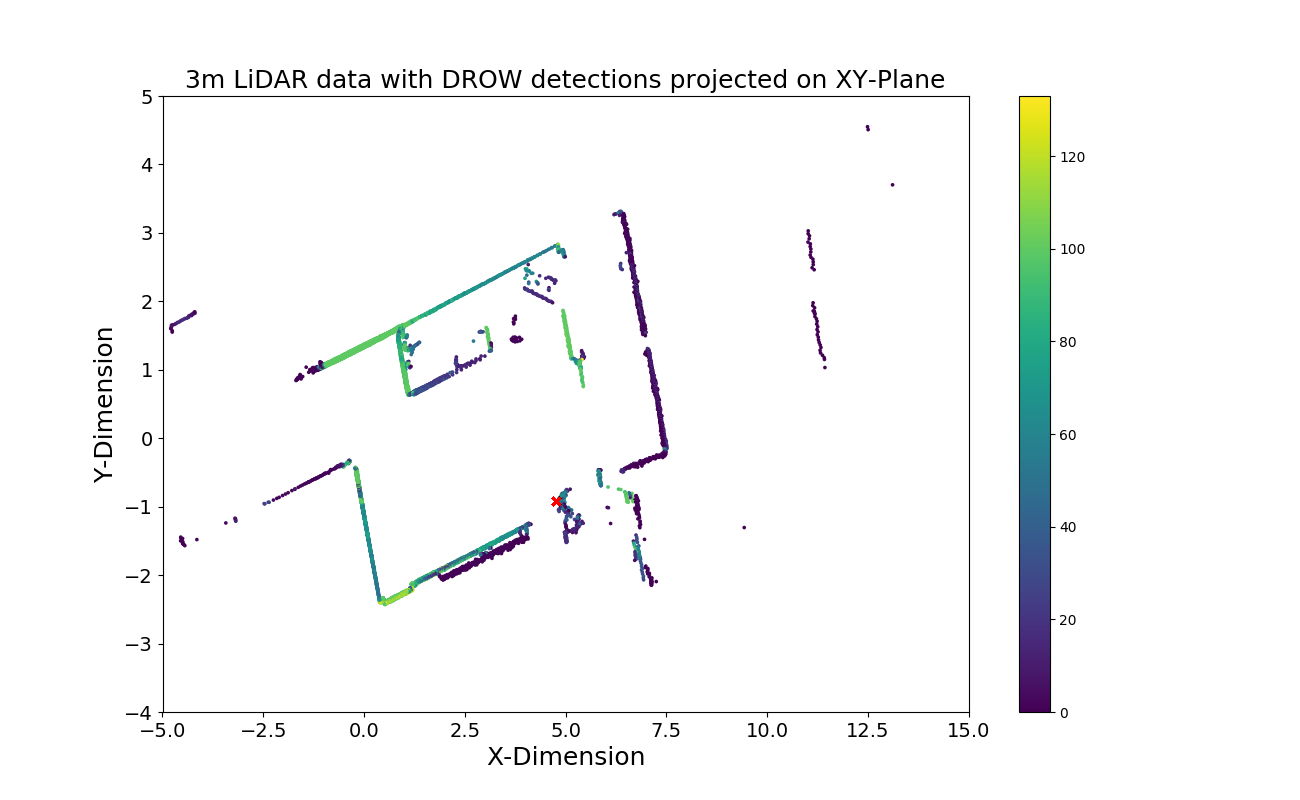

Timestamp: 1585676295785682951
16001


<IPython.core.display.Javascript object>


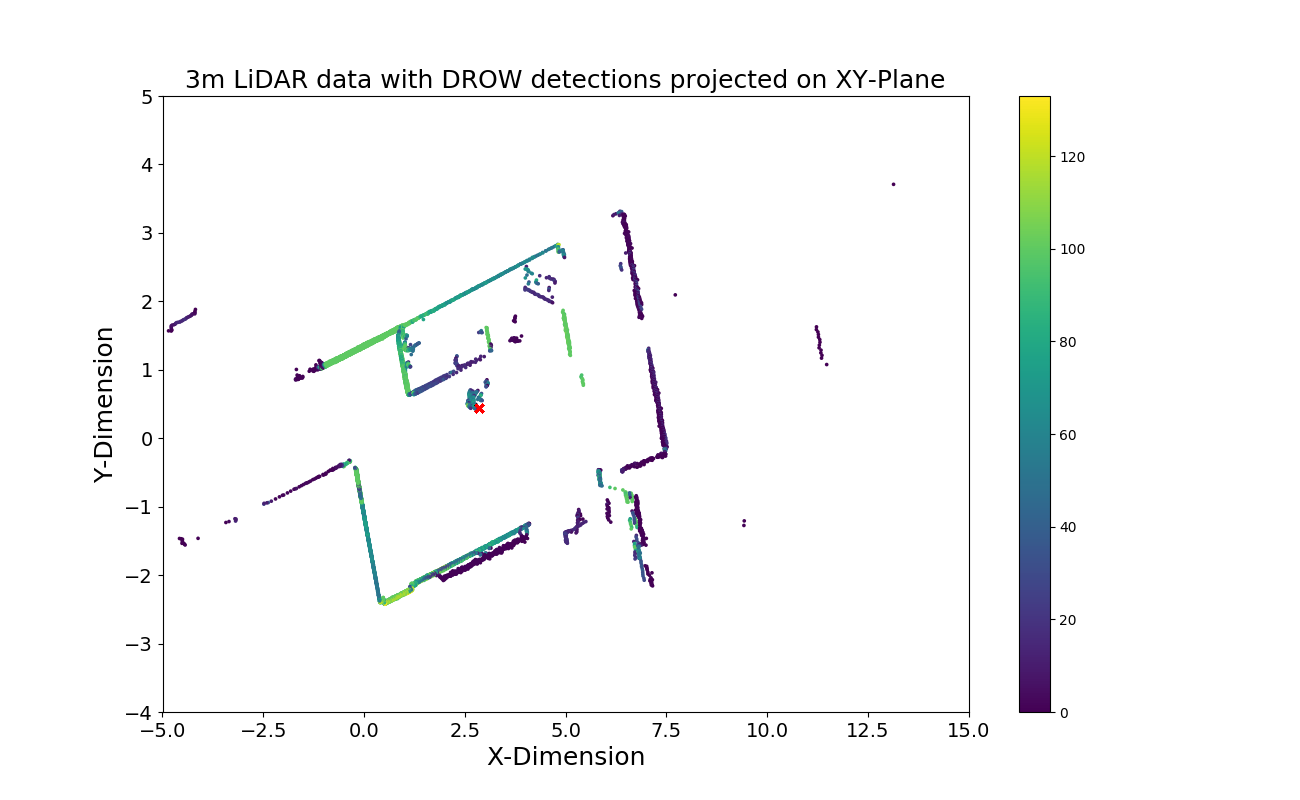

Timestamp: 1585676300326047063
16012


<IPython.core.display.Javascript object>


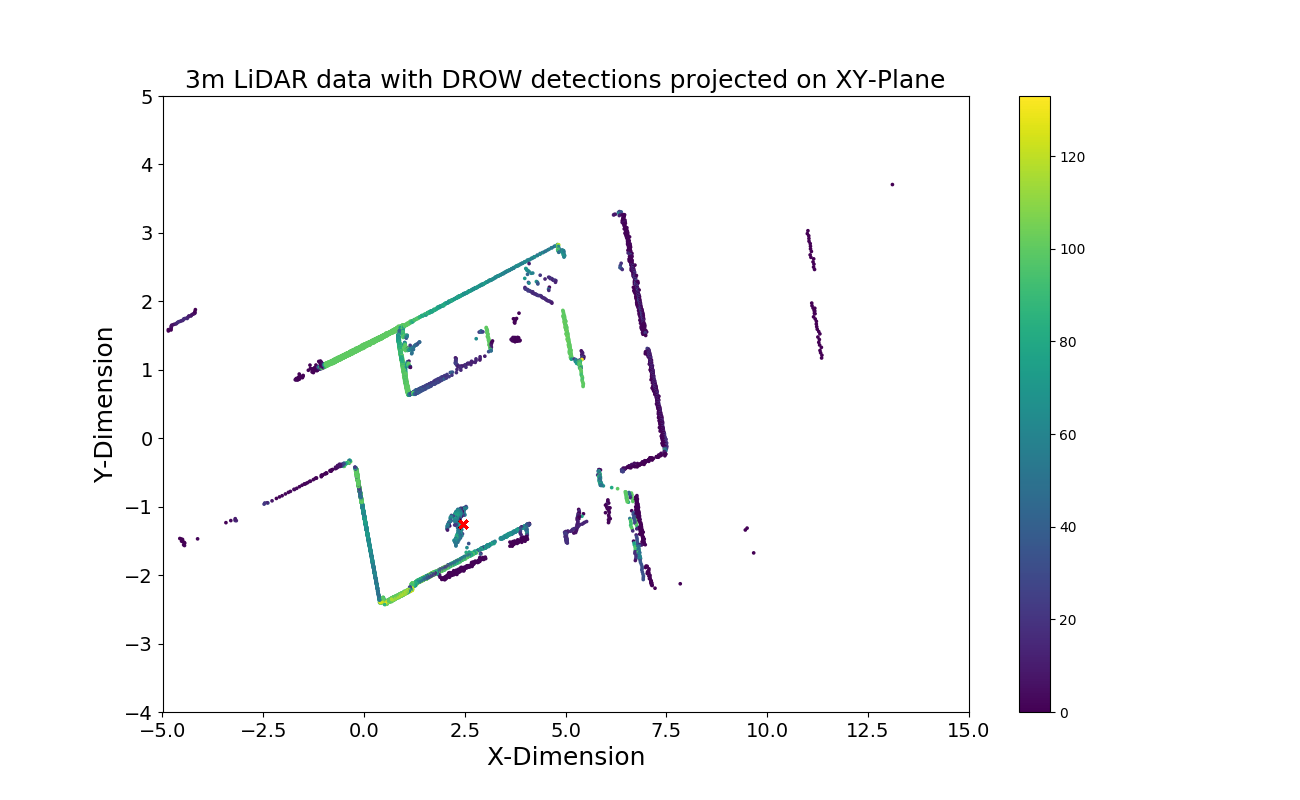

Timestamp: 1585676304866453015
15849


<IPython.core.display.Javascript object>


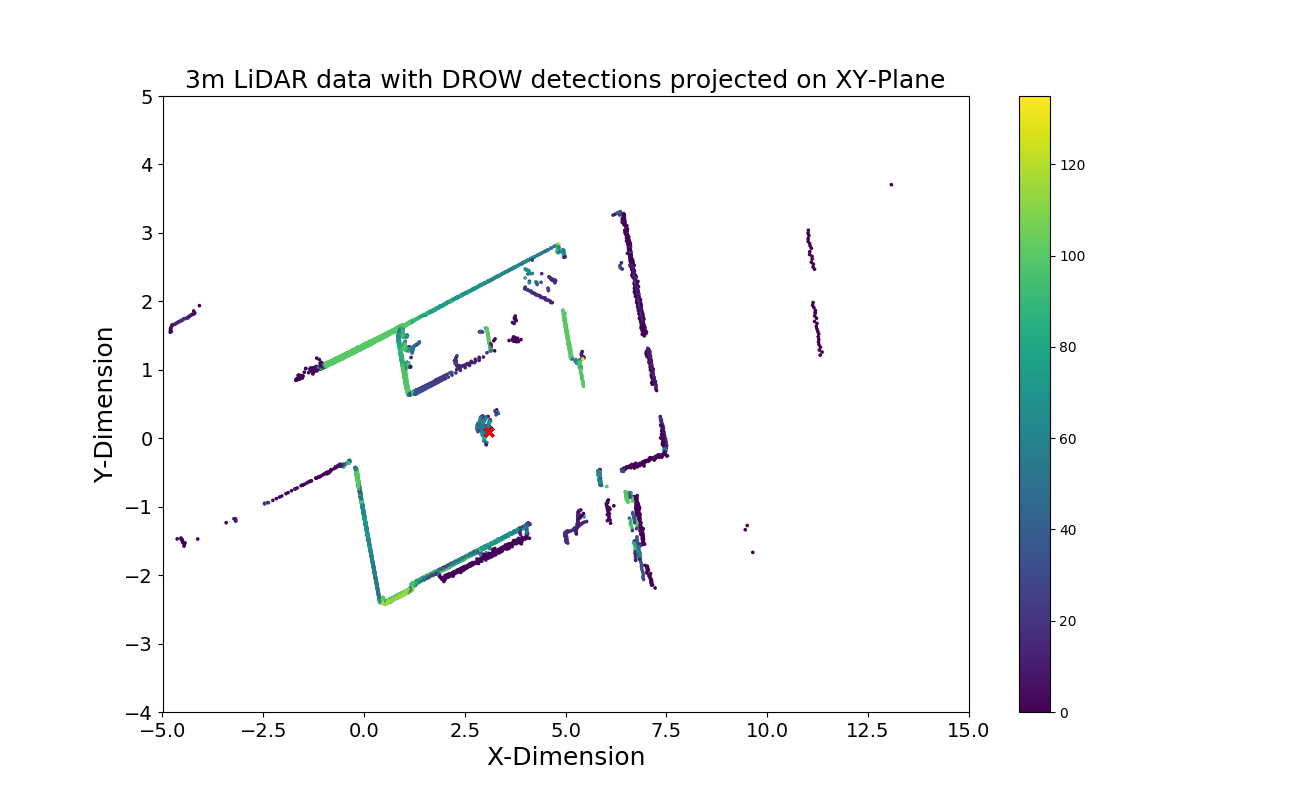

Timestamp: 1585676309400793607
15985


<IPython.core.display.Javascript object>


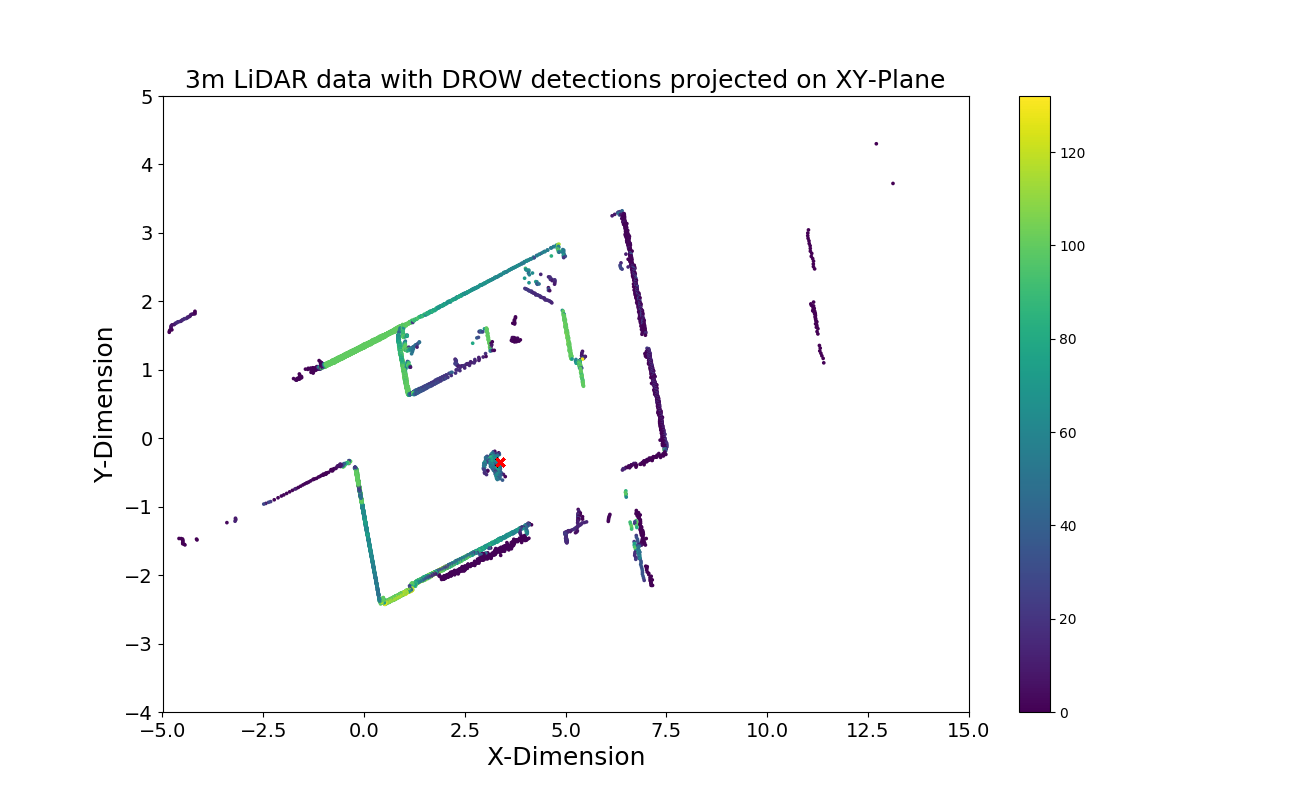

Timestamp: 1585676313937753671
15820


<IPython.core.display.Javascript object>


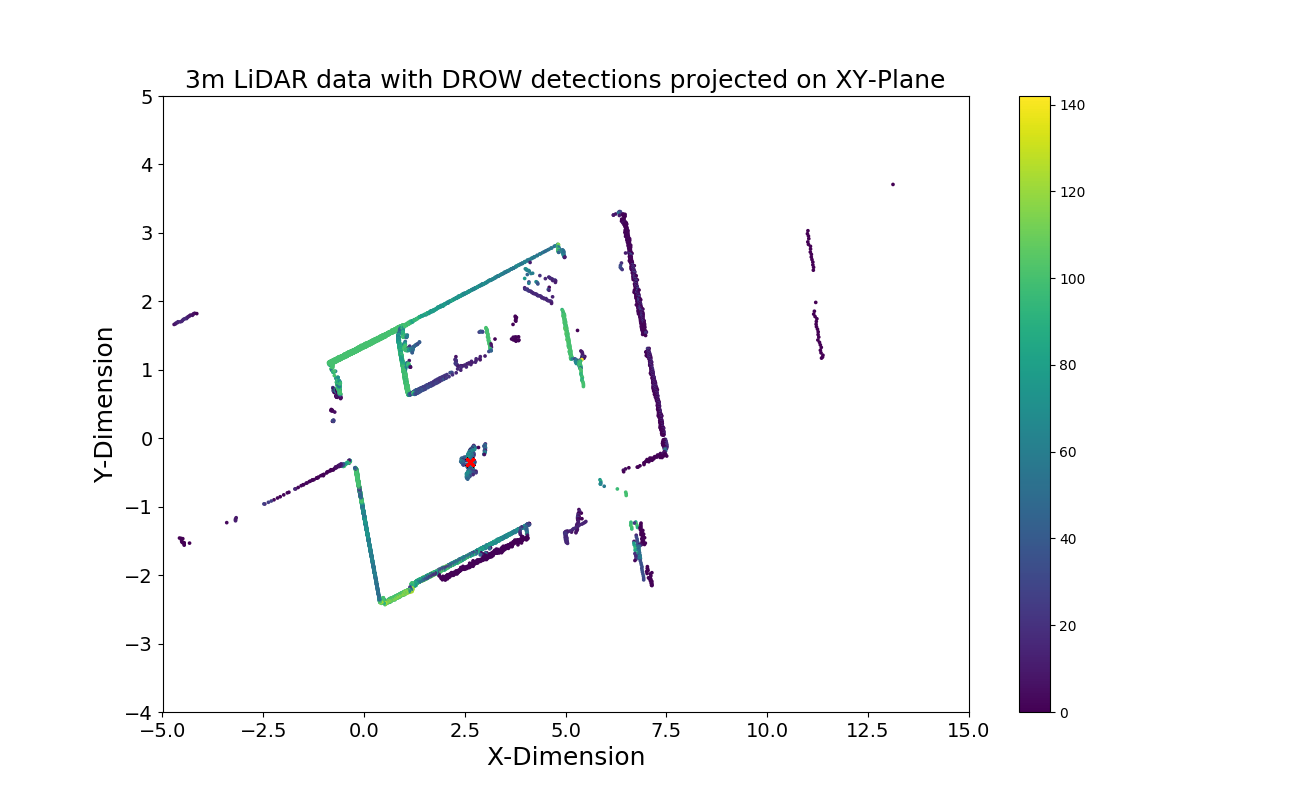

Timestamp: 1585676318477447543
16058


<IPython.core.display.Javascript object>


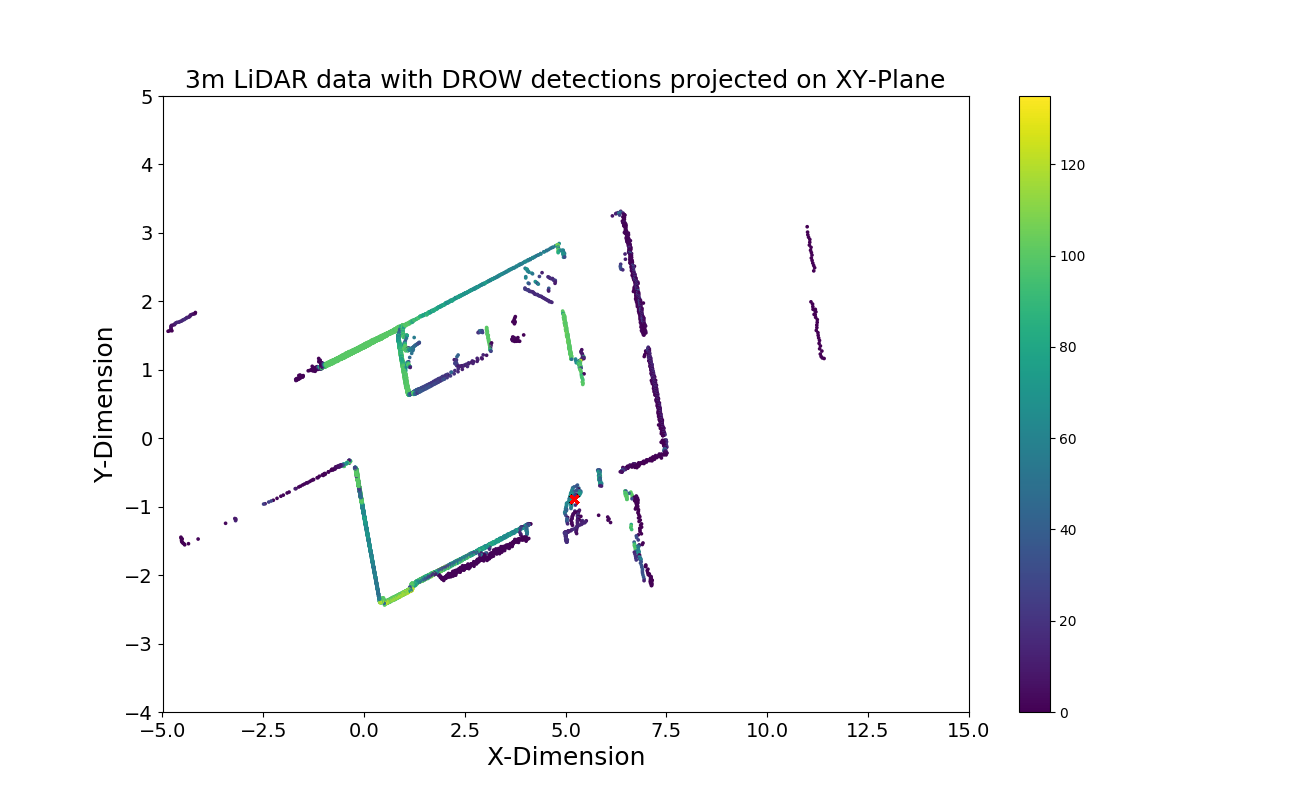

In [35]:
for i,t in enumerate(subsample):
    print('Timestamp: {}'.format(t))
    x = df_with_detections[df_with_detections.rosbagTimestamp == subsample[i]].reset_index()
    x_trans = df_apply_rot(x)
    x_trans = remove_ground_points(x_trans, -0.38)
    print(len(x_trans))
    
    fig = plt.figure(figsize=[13,8])
    ax = fig.add_subplot(111)
    ax.scatter(x_trans['x'], x_trans['y'], c=x_trans['intensity'], s=7, edgecolor='', marker='o')
    ax.scatter(x.det_x, x.det_y, c= 'r', s=30, edgecolor='', marker='x')
    
    
    ax.set_xlabel('X-Dimension', fontsize=18)
    ax.set_ylabel('Y-Dimension', fontsize=18)
    ax.set_xlim([-5,15])
    ax.set_ylim([-4, 5])
    ax.tick_params(labelsize=14)
    fig.colorbar(ax.collections[0], ax=ax)

    
    plt.title('{}m LiDAR data with DROW detections projected on XY-Plane'.format(walking_dist), fontsize=18)
    filename = '{}m_data_detections{}'.format(walking_dist,i)
    save_dir = os.getcwd()
    save_dir = os.path.join(save_dir, "../plots/") + str(filename) + '.pdf'
    
#     plt.savefig(save_dir, bbox_inches='tight', dpi=40)  
    plt.show()
    

## SEGMENTATION - Clustering

In [80]:
timestamp = 1585676313937753671
# Uncomment this for crossvalidation
# timestamp = 1585676309400793607
x = df_with_detections[df_with_detections.rosbagTimestamp == timestamp].reset_index(drop=True)
x_trans = df_apply_rot(x)
# Uncomment if only working with a prefiltered subset of data points (after knowing fixed walking dist of dataset)
# x_trans =  x_trans[x_trans.x.between(2.5, 3.5)].reset_index(drop=True)
x_trans = remove_ground_points(x_trans, -0.38)
print(x_trans.shape)

(15820, 4)


In [81]:
# Data 
norm_data = standardize_data(x_trans)
cluster_data = norm_data.to_numpy()
# cluster_data = x_trans.to_numpy()[:,:3]
print(cluster_data.shape)

(15820, 4)


<IPython.core.display.Javascript object>


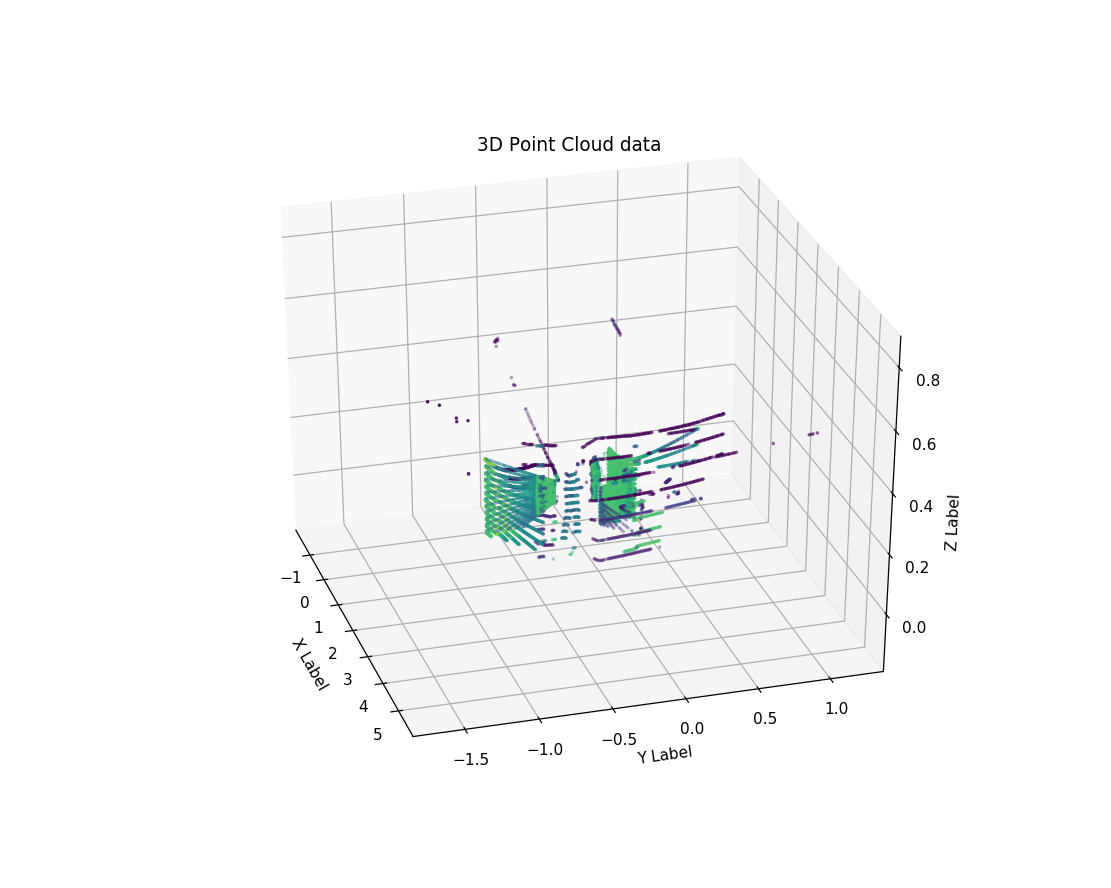

In [33]:
plot_pointcloud3d(cluster_data, point_size=1)

### Helper Functions

In [15]:
def return_cluster_and_noise_points(cluster_model): 
    labels = cluster_model.labels_
    #  Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    return n_clusters_, n_noise_

In [16]:
def plot_xy_cluster_results(cluster_data, cluster_model):
    labels = cluster_model.labels_
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    
    core_samples_mask = None 
    try:
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[cluster_model.core_sample_indices_] = True
    except AttributeError: # not every clustering model has core samples
        core_samples_mask = None 
    
    fig = plt.figure(figsize=[13, 8])

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        if core_samples_mask is not None: 
            xy = cluster_data[class_member_mask & core_samples_mask]
            xy_outlier = cluster_data[class_member_mask & ~core_samples_mask]
            plt.plot(xy_outlier[:, 0], xy_outlier[:, 1], 'x', markerfacecolor=tuple(col),
                     markeredgecolor=tuple(col), markersize=1)
        else: 
            xy = cluster_data[class_member_mask]

        plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
                 markeredgecolor=tuple(col), markersize=8)

        
    n_clusters_, _ = return_cluster_and_noise_points(cluster_model)
    plt.ylim((-1,1))
    plt.xlim((-2,3))
    plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=18)
    plt.tick_params(labelsize=14)
    plt.ylabel('Y', fontsize=16)
    plt.xlabel('X', fontsize=16)
    plt.show()
    return fig

In [17]:
def plot_3d_cluster_results(cluster_data, cluster_model):   
    fig = plt.figure(figsize=[10, 8])
    ax = fig.add_subplot(111, projection='3d')
    labels = cluster_model.labels_
    unique_labels = set(labels)
    colors = [plt.cm.hsv(each)  for each in np.linspace(0, 1, len(unique_labels))]
#     colors = [plt.cm.Spectral(each)  for each in np.linspace(0, 1, len(unique_labels))]

    core_samples_mask = None 
    try:
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[cluster_model.core_sample_indices_] = True
    except AttributeError: 
        core_samples_mask = None 
    for k, col in zip(unique_labels, colors):  
        if k == -1:    # Black used for noise.    
            col = [0, 0, 0, 1]  
        class_member_mask = (labels == k) 
        
        if core_samples_mask is not None: 
            xyz = cluster_data[class_member_mask & core_samples_mask]  
            xyz_outlier = cluster_data[class_member_mask & ~core_samples_mask]
            ax.scatter(xyz_outlier[:, 0], xyz_outlier[:, 1], xyz_outlier[:, 2], c=col, marker="x")
        else: 
            xyz = cluster_data[class_member_mask]
        
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=col, marker=".", label=k)

    ax.set_ylabel('Y', fontsize=18)
    ax.set_xlabel('X', fontsize=18)
    ax.set_zlabel('Z', fontsize=18)
    n_clusters_, _ = return_cluster_and_noise_points(cluster_model)

    ax.legend(fontsize='x-large', markerscale=5, loc='center left', bbox_to_anchor=(1, 0.5), title="Labels")
    plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=20)
    ax.tick_params(labelsize=14)
    plt.show()

In [18]:
# Activate interactive plotting mode to be able to zoom in 
%matplotlib notebook
%matplotlib notebook

###  DBSCAN

In [19]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.neighbors import DistanceMetric
from sklearn import metrics 

Finding optimal value for $\epsilon$ as shown in [this source](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc) at the point of maximum curvature in the distances to the clostest n_neighbors.

<IPython.core.display.Javascript object>


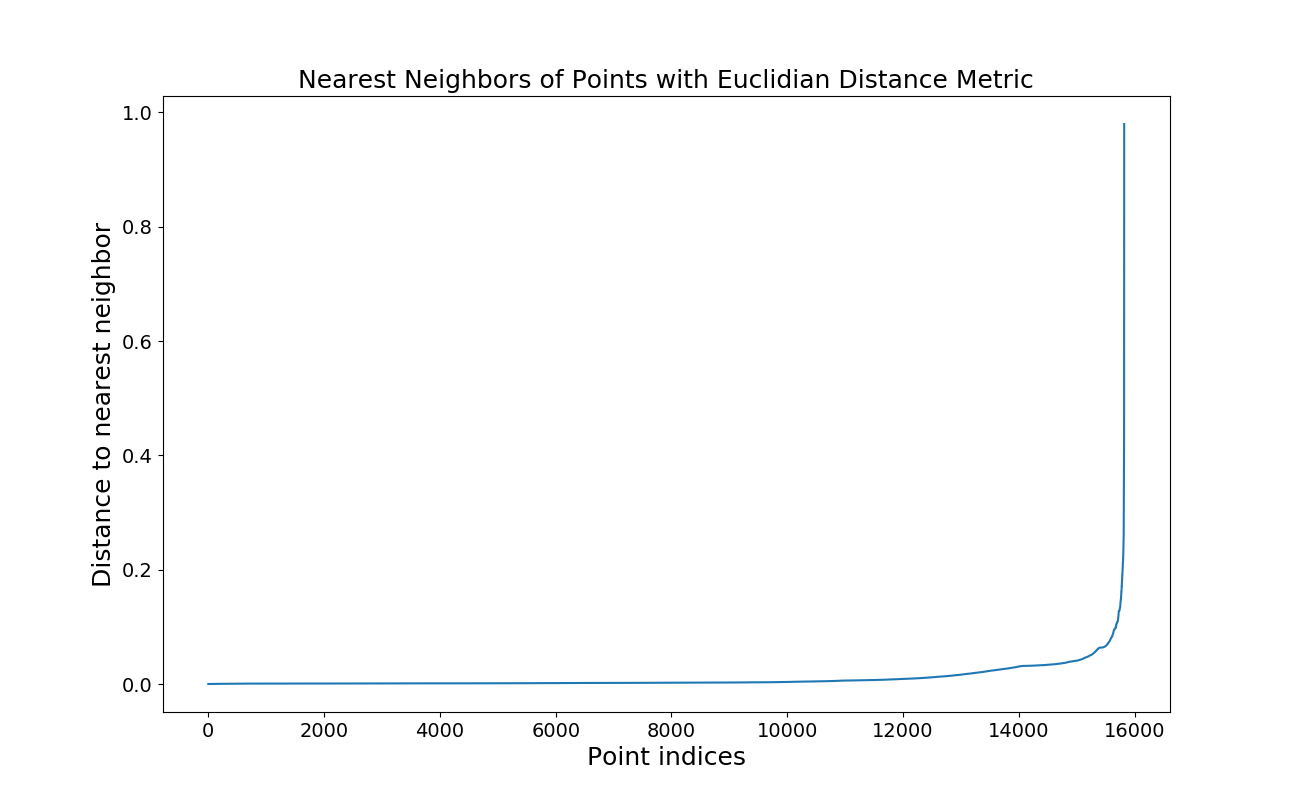

In [40]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(cluster_data)
# indices of the nearest points in the population matrix.
distances, indices = nbrs.kneighbors(cluster_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=[13,8])
plt.xlabel('Point indices', fontsize=18)
plt.ylabel('Distance to nearest neighbor', fontsize=18)
plt.title('Nearest Neighbors of Points with Euclidian Distance Metric', fontsize=18)
plt.tick_params(labelsize=14)
plt.plot(distances)
save_fig(fig, 'DBSCAN_NNeigh_Eucl')

In [41]:
distances.shape

(15820,)

In [42]:
neigh = NearestNeighbors(n_neighbors=2, 
                         metric='mahalanobis', 
                         metric_params={'V': np.cov(cluster_data, rowvar=False)})
nbrs = neigh.fit(cluster_data)
distances, indices = nbrs.kneighbors(cluster_data)
distances = distances[:,1]

<IPython.core.display.Javascript object>


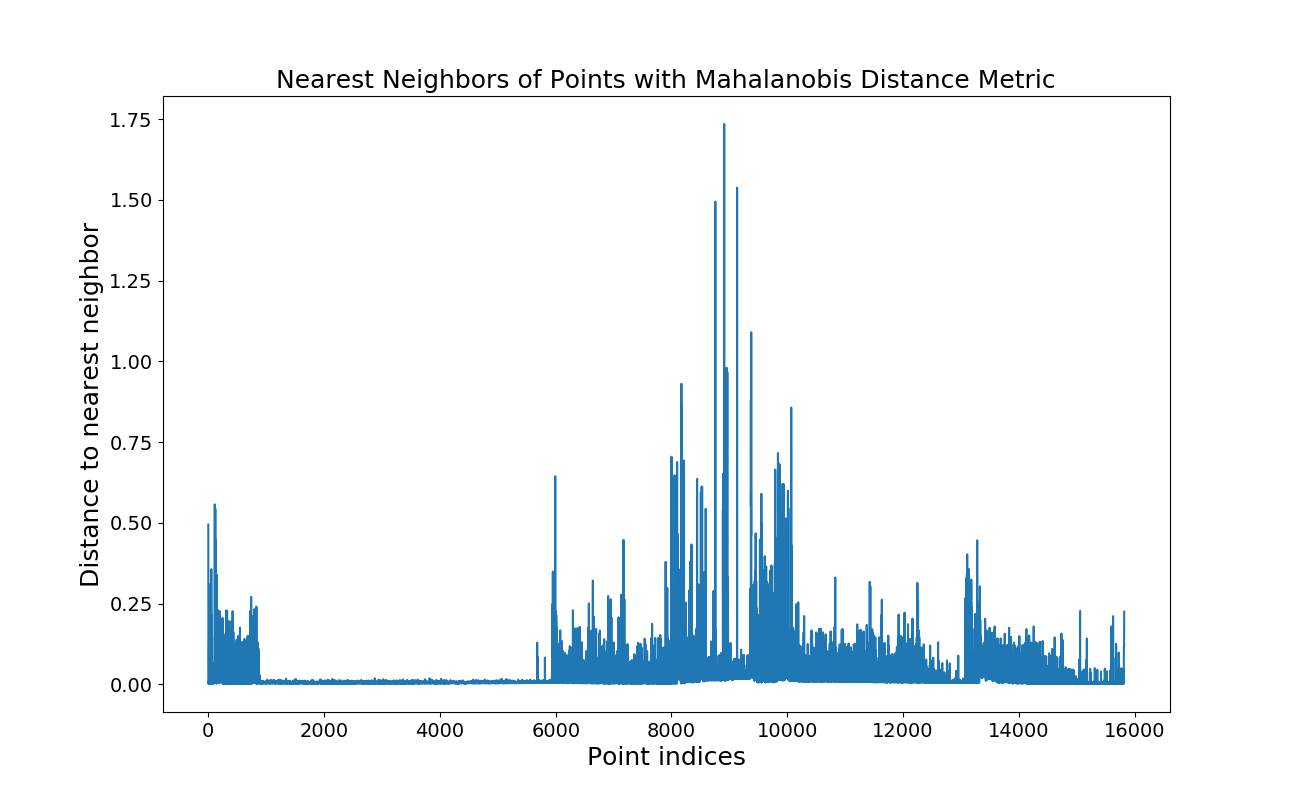

In [43]:
fig = plt.figure(figsize=[13,8])
plt.xlabel('Point indices', fontsize=18)
plt.ylabel('Distance to nearest neighbor', fontsize=18)
plt.title('Nearest Neighbors of Points with Mahalanobis Distance Metric', fontsize=18)
plt.tick_params(labelsize=14)
plt.plot(distances)
save_fig(fig, 'DBSCAN_NNeigh_Mahal')

In [47]:
# evaluate different distance metrics under kd_tree algorithm
from sklearn import neighbors
neighbors.VALID_METRICS['kd_tree']

['chebyshev',
 'euclidean',
 'cityblock',
 'manhattan',
 'infinity',
 'minkowski',
 'p',
 'l2',
 'l1']

In [43]:
# Activate interactive plotting mode to be able to zoom in 
%matplotlib notebook

In [148]:
# eps = search radius -- most important hyperparam of dbscan 
# choose eps as 5x/10x/... point cloud resolution which is ~+/-3cm within 10m
metric = 'euclidean'
eps = 0.15
min_samples = 50
t0 = time.time()
clustering_dbscan = DBSCAN(eps=eps,min_samples=min_samples,metric=metric, algorithm='kd_tree').fit(cluster_data)
t1 = time.time()
duration = ('%.2fs' % (t1 - t0)).lstrip('0')

In [134]:
print(duration)

1.17s


<IPython.core.display.Javascript object>


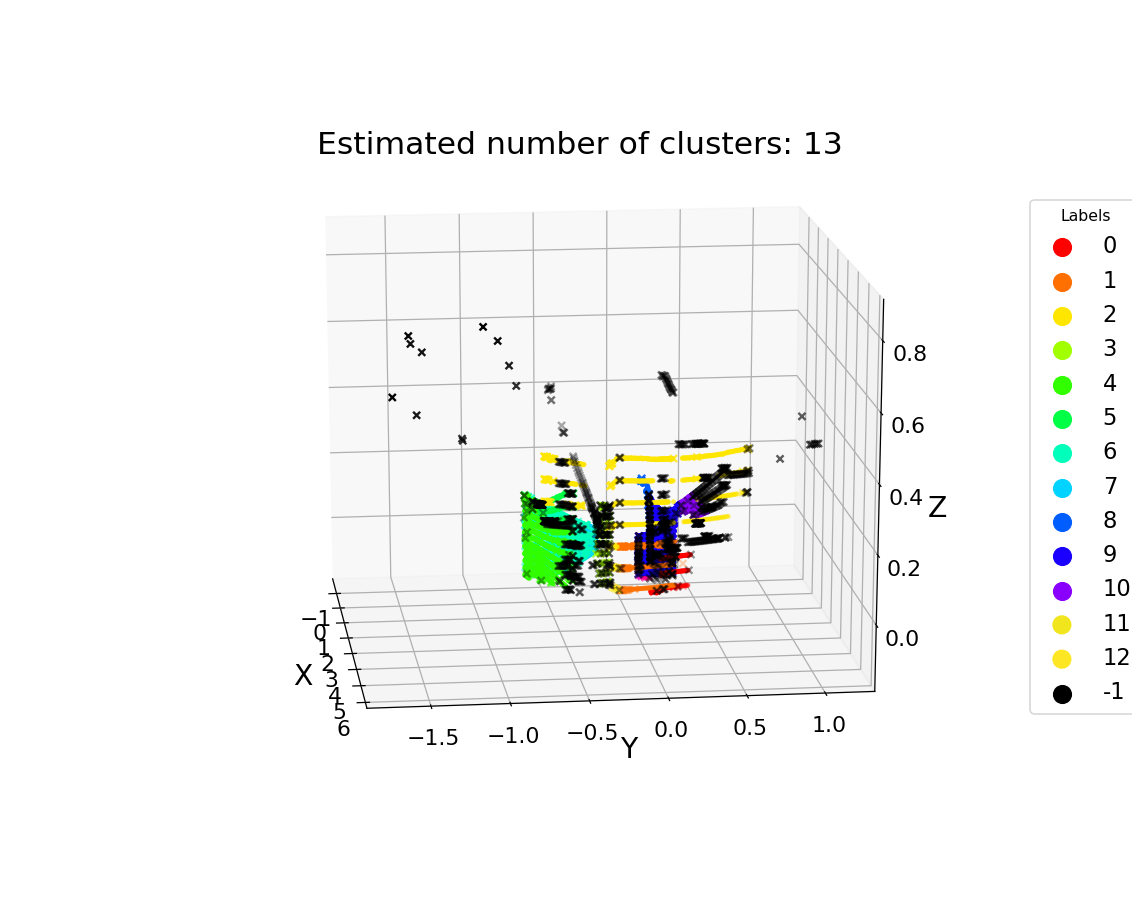

In [27]:
plot_3d_cluster_results(cluster_data, clustering_dbscan)

<IPython.core.display.Javascript object>


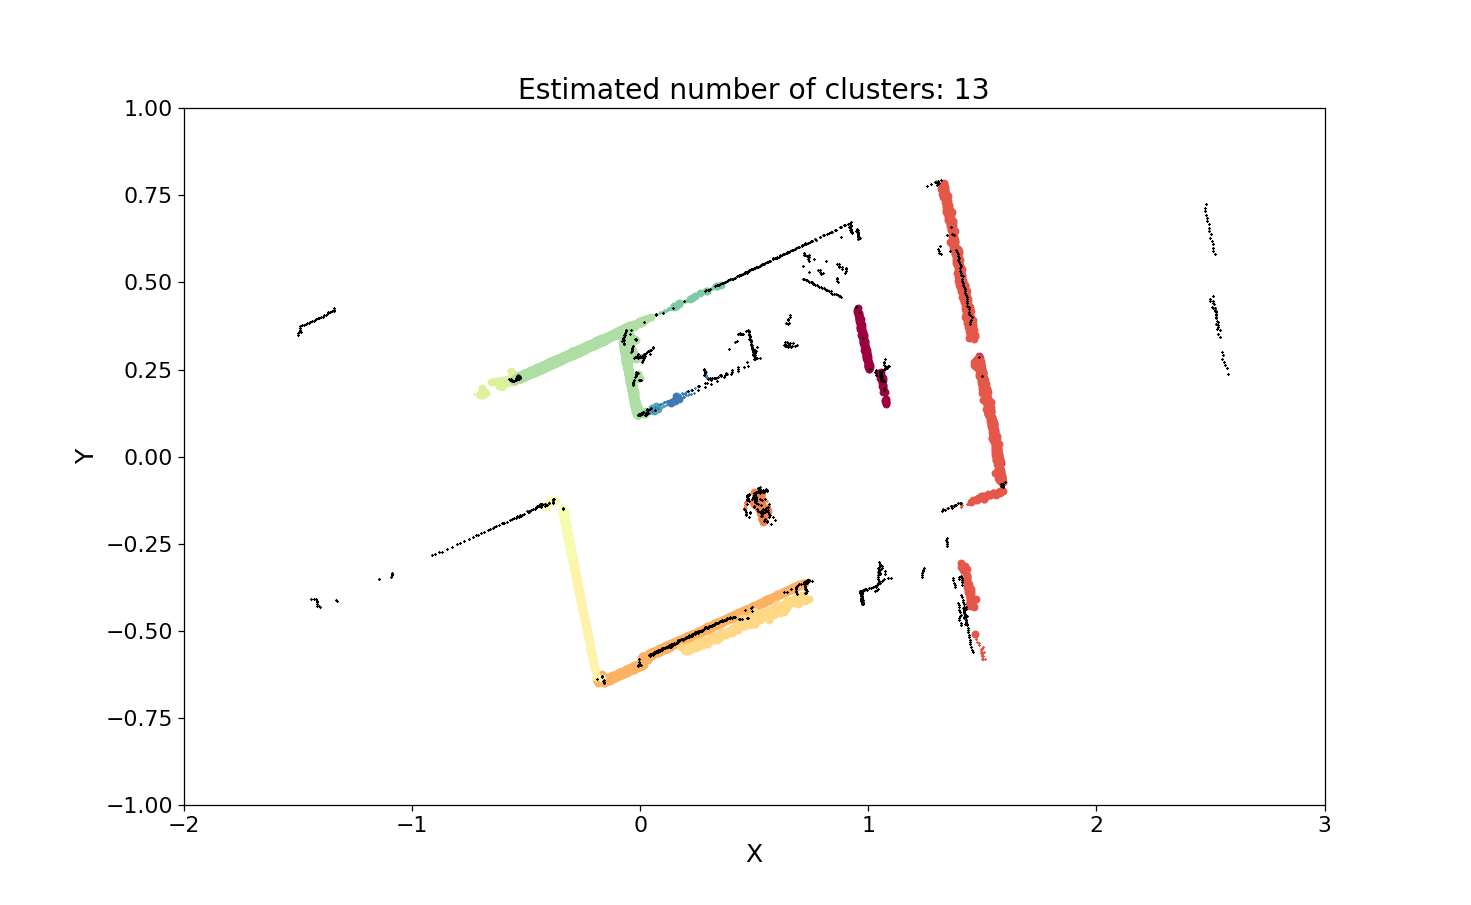

In [28]:
fig = plot_xy_cluster_results(cluster_data, clustering_dbscan)
save_fig(fig, 'cross_val')

#### Grid Search

In [81]:
cluster_data.shape

(15820, 4)

In [84]:
from sklearn import metrics 
eps_vals = [0.1, 0.15, 0.25, 0.3, 0.35, 0.4]
min_samples = [5, 10, 15, 20, 25, 30, 35, 45, 50]
measures = ['euclidean', 'manhattan']
i = 1
results= collections.defaultdict(list)
for metric in measures: 
    for eps in eps_vals: 
        for samp in min_samples: 
            print('==========================================')
            print("Round {} -- (metric={}, eps={}, min_samp={})\n\n".format(i, metric, eps, samp))
            t0 = time.time()
            clustering = DBSCAN(eps=eps,min_samples=samp, metric=metric, algorithm='kd_tree').fit(cluster_data)
            t1 = time.time()
            duration = ('%.2fs' % (t1 - t0)).lstrip('0')
#             silhouette_score = metrics.silhouette_score(cluster_data, clustering.labels_ ,metric='euclidean')
            score = metrics.calinski_harabaz_score(cluster_data, clustering.labels_)
            n_clusters_, n_noise_ = return_cluster_and_noise_points(clustering)
#             print('Metric:{}\nDuration: {}\nSilhouette Score:{}\nClusters:{}\nNoise points:{}'.format(metric, duration, silhouette_score, n_clusters_, n_noise_))
#             print("{}) & {} & {} & {} & {} & {} & {} & {:.4f} \\ \n".format(i, eps, samp, metric, duration, n_clusters_, n_noise_, silhouette_score))
            results[metric].append({'eps':eps, 'min_samp':samp,'duration': duration, 'clusters': n_clusters_, 'noise': n_noise_, 'silhouette': score})
            i +=1

Round 1 -- (metric=euclidean, eps=0.1, min_samp=5)


Round 2 -- (metric=euclidean, eps=0.1, min_samp=10)


Round 3 -- (metric=euclidean, eps=0.1, min_samp=15)


Round 4 -- (metric=euclidean, eps=0.1, min_samp=20)


Round 5 -- (metric=euclidean, eps=0.1, min_samp=25)


Round 6 -- (metric=euclidean, eps=0.1, min_samp=30)


Round 7 -- (metric=euclidean, eps=0.1, min_samp=35)


Round 8 -- (metric=euclidean, eps=0.1, min_samp=45)


Round 9 -- (metric=euclidean, eps=0.1, min_samp=50)


Round 10 -- (metric=euclidean, eps=0.15, min_samp=5)


Round 11 -- (metric=euclidean, eps=0.15, min_samp=10)


Round 12 -- (metric=euclidean, eps=0.15, min_samp=15)


Round 13 -- (metric=euclidean, eps=0.15, min_samp=20)


Round 14 -- (metric=euclidean, eps=0.15, min_samp=25)


Round 15 -- (metric=euclidean, eps=0.15, min_samp=30)


Round 16 -- (metric=euclidean, eps=0.15, min_samp=35)


Round 17 -- (metric=euclidean, eps=0.15, min_samp=45)


Round 18 -- (metric=euclidean, eps=0.15, min_samp=50)


Round 19 -- 

Round 85 -- (metric=manhattan, eps=0.3, min_samp=20)


Round 86 -- (metric=manhattan, eps=0.3, min_samp=25)


Round 87 -- (metric=manhattan, eps=0.3, min_samp=30)


Round 88 -- (metric=manhattan, eps=0.3, min_samp=35)


Round 89 -- (metric=manhattan, eps=0.3, min_samp=45)


Round 90 -- (metric=manhattan, eps=0.3, min_samp=50)


Round 91 -- (metric=manhattan, eps=0.35, min_samp=5)


Round 92 -- (metric=manhattan, eps=0.35, min_samp=10)


Round 93 -- (metric=manhattan, eps=0.35, min_samp=15)


Round 94 -- (metric=manhattan, eps=0.35, min_samp=20)


Round 95 -- (metric=manhattan, eps=0.35, min_samp=25)


Round 96 -- (metric=manhattan, eps=0.35, min_samp=30)


Round 97 -- (metric=manhattan, eps=0.35, min_samp=35)


Round 98 -- (metric=manhattan, eps=0.35, min_samp=45)


Round 99 -- (metric=manhattan, eps=0.35, min_samp=50)


Round 100 -- (metric=manhattan, eps=0.4, min_samp=5)


Round 101 -- (metric=manhattan, eps=0.4, min_samp=10)


Round 102 -- (metric=manhattan, eps=0.4, min_samp=15)




In [86]:
results['euclidean']

[{'clusters': 45,
  'duration': '.74s',
  'eps': 0.1,
  'min_samp': 5,
  'noise': 327,
  'silhouette': 1255.9472271439133},
 {'clusters': 31,
  'duration': '.48s',
  'eps': 0.1,
  'min_samp': 10,
  'noise': 678,
  'silhouette': 2084.2602411763582},
 {'clusters': 29,
  'duration': '.49s',
  'eps': 0.1,
  'min_samp': 15,
  'noise': 1066,
  'silhouette': 3320.8935537405587},
 {'clusters': 24,
  'duration': '.46s',
  'eps': 0.1,
  'min_samp': 20,
  'noise': 1472,
  'silhouette': 3208.972496073789},
 {'clusters': 16,
  'duration': '.45s',
  'eps': 0.1,
  'min_samp': 25,
  'noise': 1921,
  'silhouette': 3969.752198254273},
 {'clusters': 13,
  'duration': '.45s',
  'eps': 0.1,
  'min_samp': 30,
  'noise': 2152,
  'silhouette': 4591.394752852181},
 {'clusters': 14,
  'duration': '.45s',
  'eps': 0.1,
  'min_samp': 35,
  'noise': 2391,
  'silhouette': 3881.341456769715},
 {'clusters': 14,
  'duration': '.45s',
  'eps': 0.1,
  'min_samp': 45,
  'noise': 3108,
  'silhouette': 3141.048763732256},


<IPython.core.display.Javascript object>


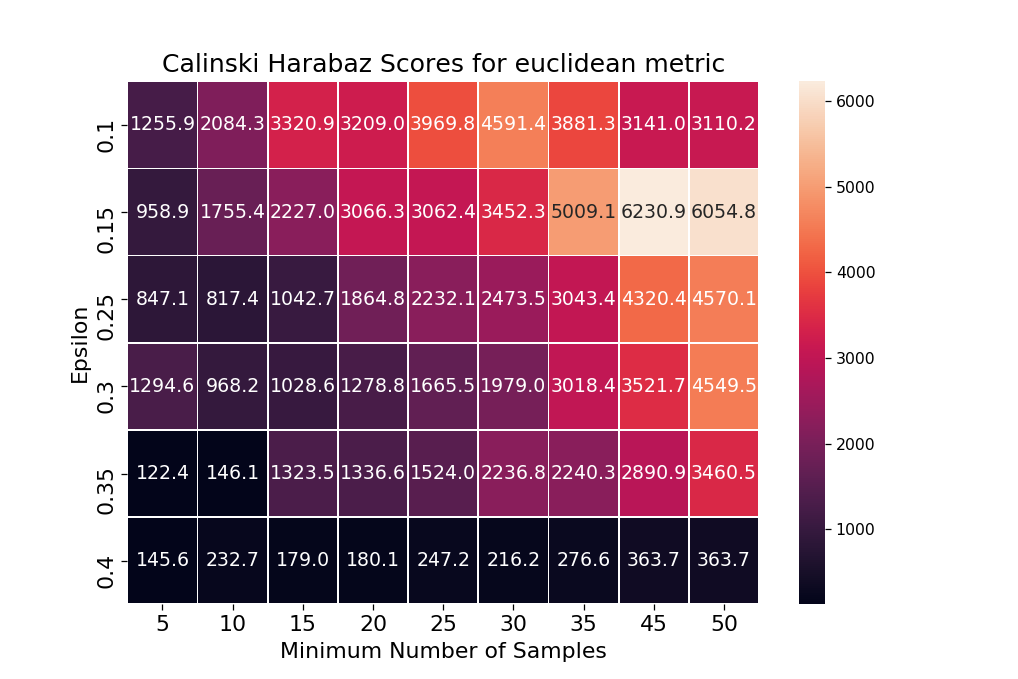

<IPython.core.display.Javascript object>


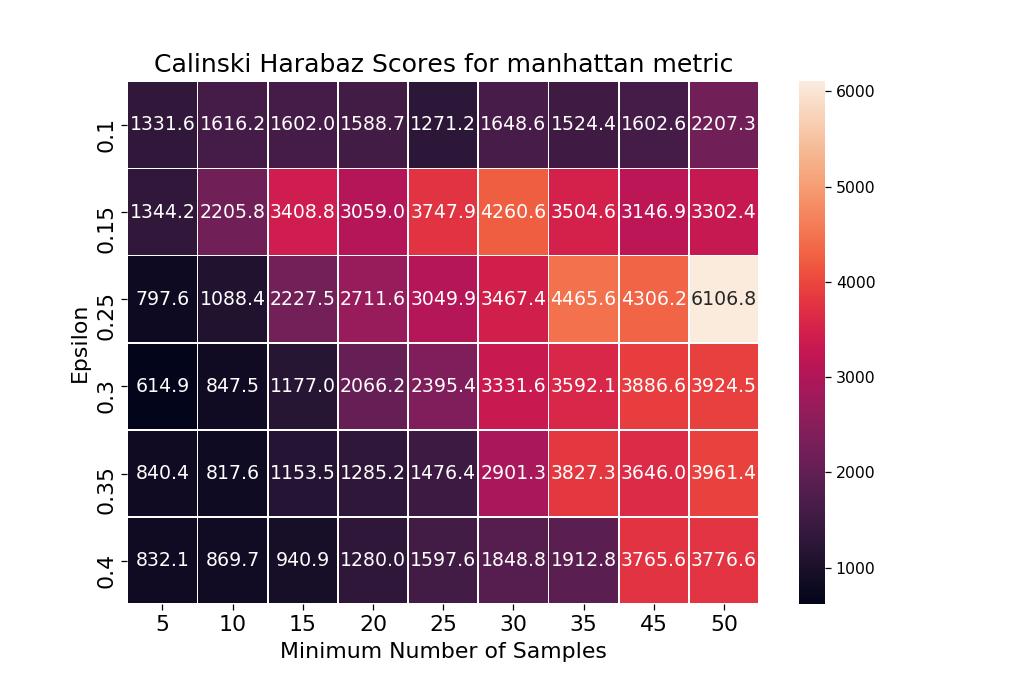

In [87]:
for metric in measures: 
    results_df = pd.DataFrame(results[metric])
    pvt = pd.pivot_table(results_df, values='silhouette', index=['eps'], columns=['min_samp'])
    #vmin=-1, vmax=1
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(pvt, annot=True, fmt=".1f", linewidths=.5, annot_kws={'size':12})
    plt.title('Calinski Harabaz Scores for {} metric'.format(metric),fontsize=16)
    plt.xlabel('Minimum Number of Samples', fontsize=14)
    plt.ylabel('Epsilon', fontsize=14)
    ax.tick_params(labelsize=14)
    save_fig(f, 'DBSCAN_calinski_harabaz_{}'.format(metric), extension='.png')

<IPython.core.display.Javascript object>


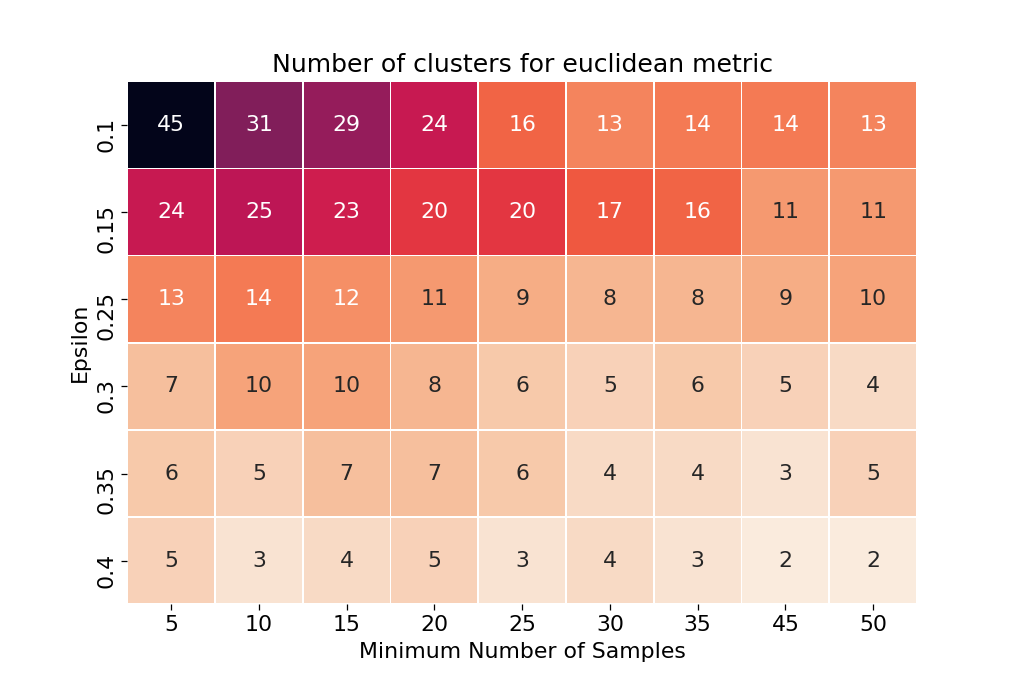

<IPython.core.display.Javascript object>


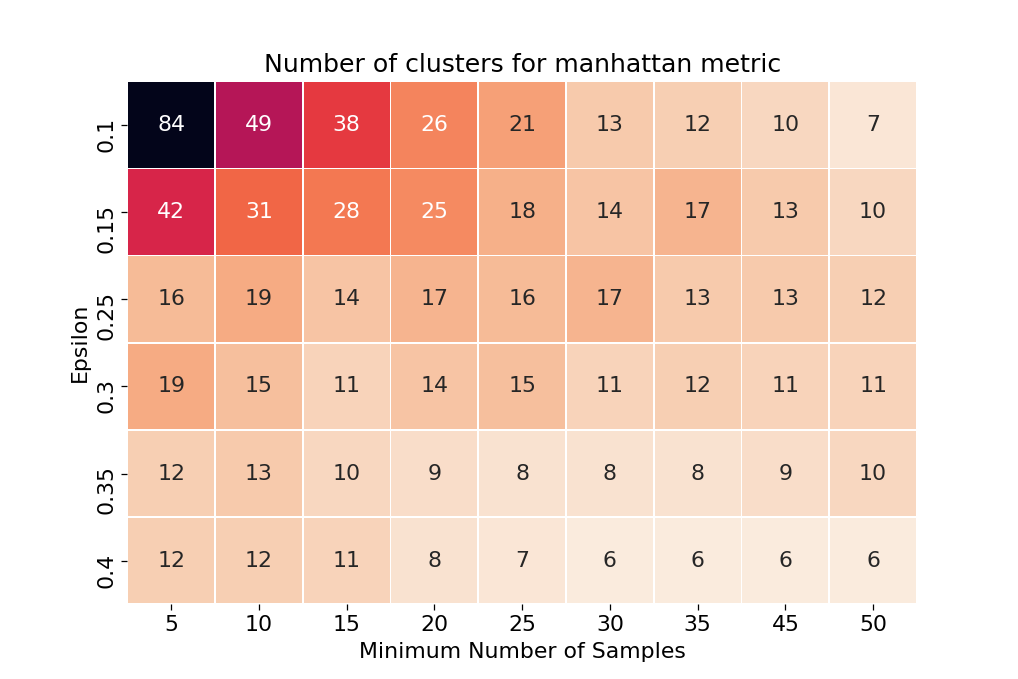

In [70]:
for metric in measures: 
    results_df = pd.DataFrame(results[metric])
    pvt = pd.pivot_table(results_df, values='clusters', index=['eps'], columns=['min_samp'])
    #vmin=-1, vmax=1
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(pvt, annot=True, fmt="d", linewidths=.5, annot_kws={'size':14},cbar=False, cmap=sns.cm.rocket_r)
    plt.title('Number of clusters for {} metric'.format(metric),fontsize=16)
    plt.xlabel('Minimum Number of Samples', fontsize=14)
    plt.ylabel('Epsilon', fontsize=14)
    ax.tick_params(labelsize=14)
    save_fig(f, 'DBSCAN_clusters_{}'.format(metric), extension='.png')

<IPython.core.display.Javascript object>


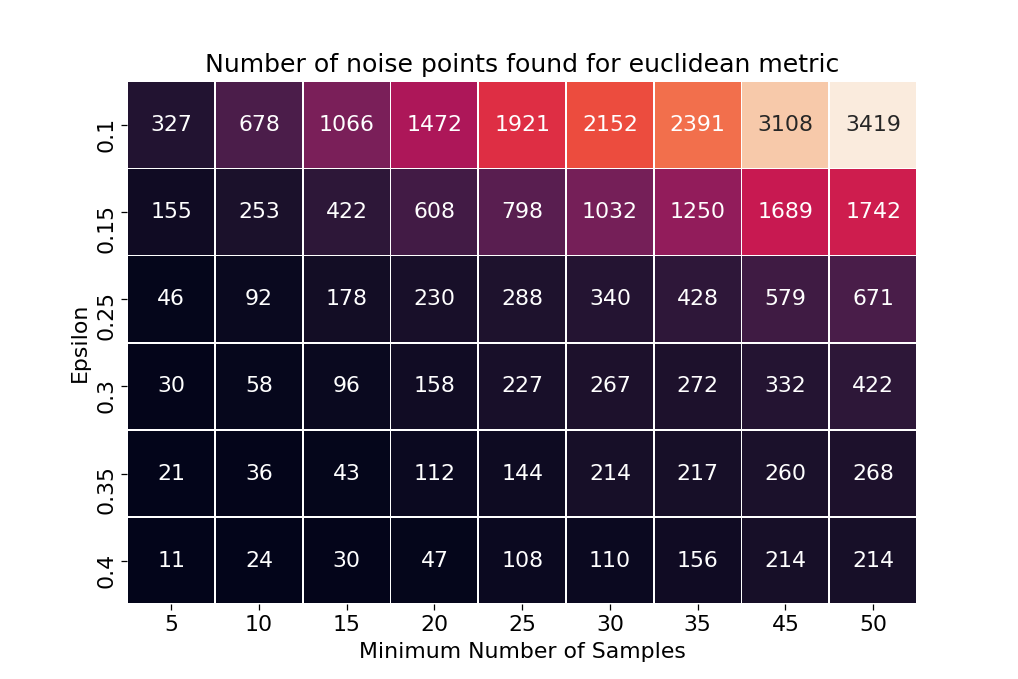

<IPython.core.display.Javascript object>


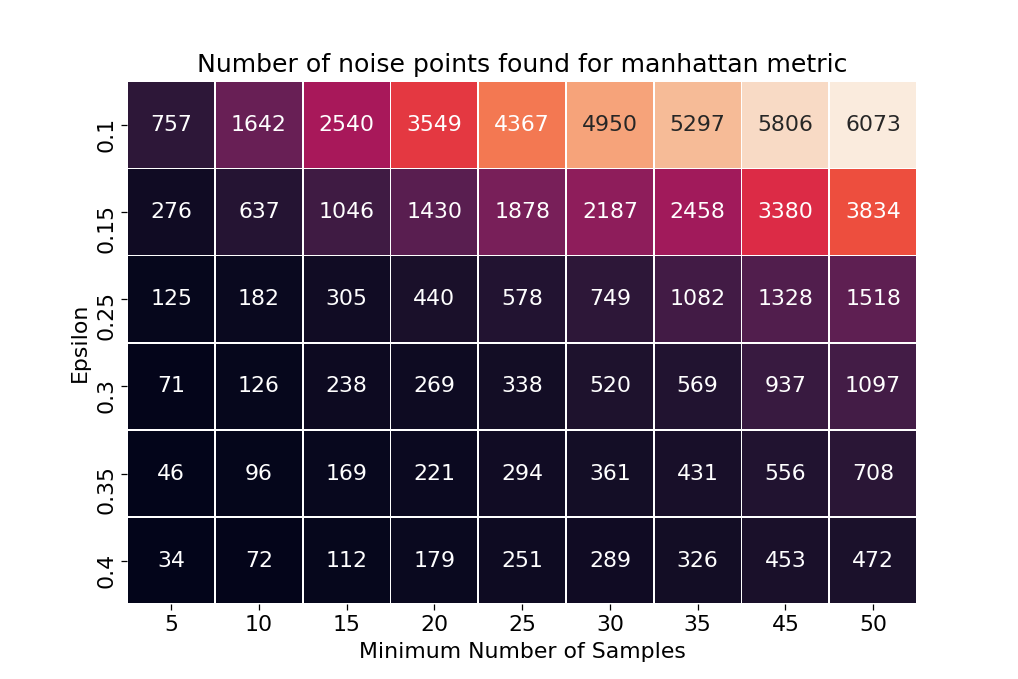

In [75]:
for metric in measures: 
    results_df = pd.DataFrame(results[metric])
    pvt = pd.pivot_table(results_df, values='noise', index=['eps'], columns=['min_samp'])
    #vmin=-1, vmax=1
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(pvt, annot=True, fmt="d", linewidths=.5, annot_kws={'size':14},cbar=False)
    plt.title('Number of noise points found for {} metric'.format(metric),fontsize=16)
    plt.xlabel('Minimum Number of Samples', fontsize=14)
    plt.ylabel('Epsilon', fontsize=14)
    ax.tick_params(labelsize=14)
    save_fig(f, 'DBSCAN_noise_{}'.format(metric), extension='.png')

<IPython.core.display.Javascript object>


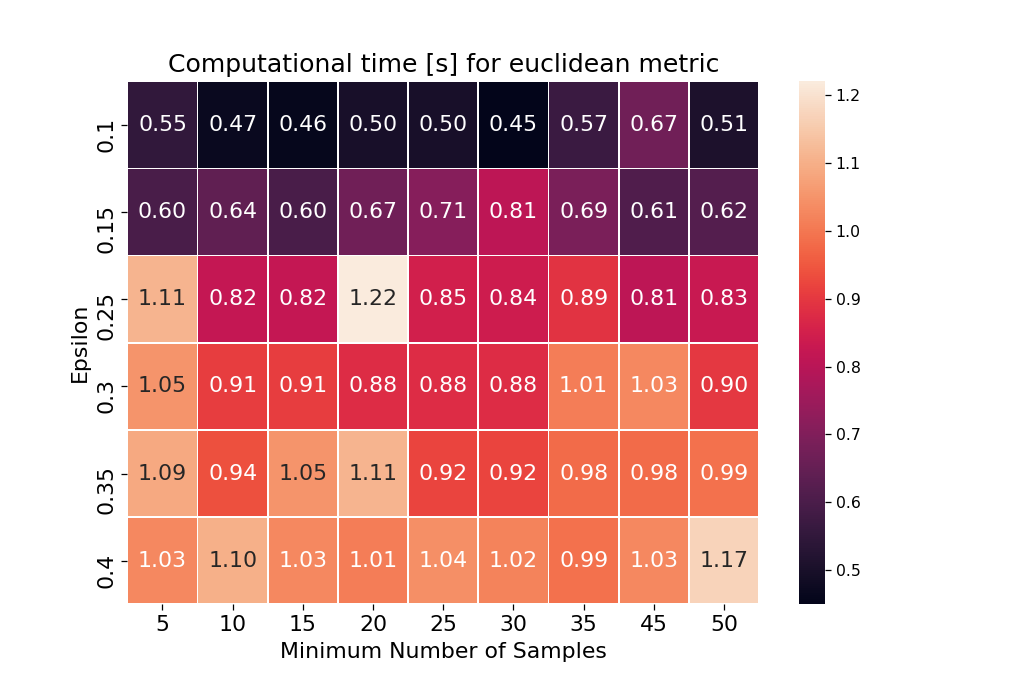

<IPython.core.display.Javascript object>


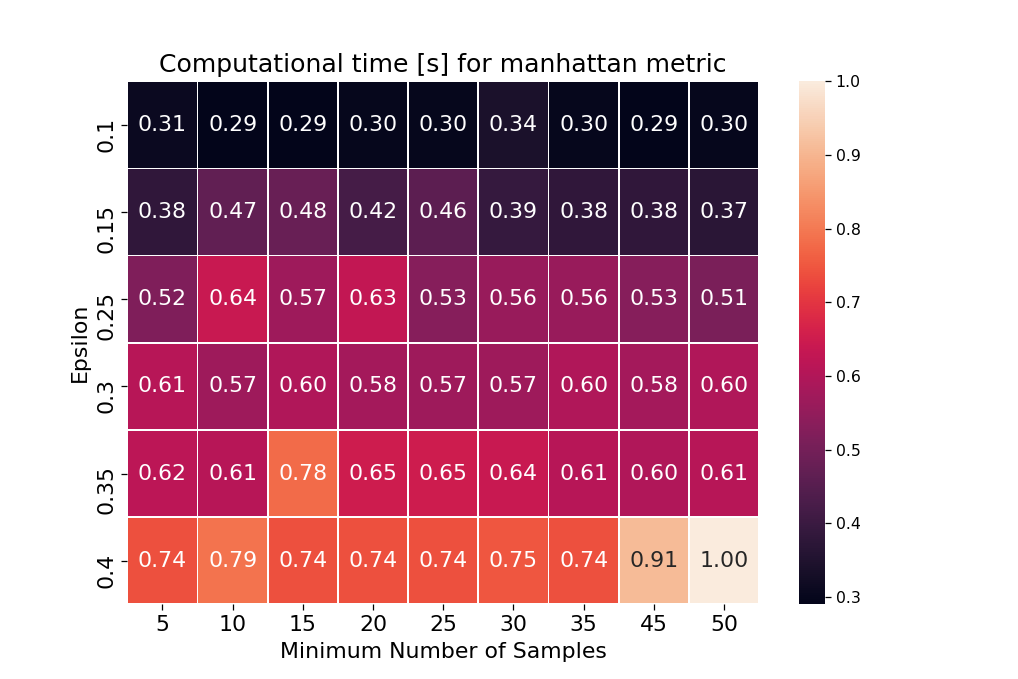

In [83]:
for metric in measures: 
    results_df = pd.DataFrame(results[metric])
    results_df['duration'] = results_df['duration'].apply(lambda x: float(x[:-1])) 
    pvt = pd.pivot_table(results_df, values='duration', index=['eps'], columns=['min_samp'])
    #vmin=-1, vmax=1
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(pvt, annot=True, fmt=".2f", linewidths=.5, annot_kws={'size':14})
    plt.title('Computational time [s] for {} metric'.format(metric),fontsize=16)
    plt.xlabel('Minimum Number of Samples', fontsize=14)
    plt.ylabel('Epsilon', fontsize=14)
    ax.tick_params(labelsize=14)
    save_fig(f, 'DBSCAN_time_{}'.format(metric), extension='.png')

In [86]:
from sklearn import metrics 
eps_vals = [0.1, 0.15, 0.25, 0.3, 0.35, 0.4]
min_samples = [5, 10, 15, 20, 25, 30, 35, 45, 50]
measures = ['euclidean', 'manhattan']
i = 1
for metric in measures: 
    for eps in eps_vals: 
        for samp in min_samples: 
            print('==========================================')
            print("Round {} -- (metric={}, eps={}, min_samp={})\n\n".format(i, metric, eps, samp))
            t0 = time.time()
            clustering = DBSCAN(eps=eps,min_samples=samp, metric=metric, algorithm='kd_tree').fit(cluster_data)
            t1 = time.time()
            duration = ('%.2fs' % (t1 - t0)).lstrip('0')
            silhouette_score = metrics.silhouette_score(cluster_data, clustering.labels_ ,metric='euclidean')
            n_clusters_, n_noise_ = return_cluster_and_noise_points(clustering)
            print('Metric:{}\nDuration: {}\nSilhouette Score:{}\nClusters:{}\nNoise points:{}'.format(metric, duration, silhouette_score, n_clusters_, n_noise_))
            i +=1

Round 1 -- (metric=euclidean, eps=0.1, min_samp=5)


Estimated number of clusters: 45
Estimated number of noise points: 327
Metric:euclidean
Duration: .46s
Silhouette Score:0.156891642035
Clusters:45
Noise points:327
Round 2 -- (metric=euclidean, eps=0.1, min_samp=10)


Estimated number of clusters: 31
Estimated number of noise points: 678
Metric:euclidean
Duration: .52s
Silhouette Score:0.302967644674
Clusters:31
Noise points:678
Round 3 -- (metric=euclidean, eps=0.1, min_samp=15)


Estimated number of clusters: 29
Estimated number of noise points: 1066
Metric:euclidean
Duration: .55s
Silhouette Score:0.34563861501
Clusters:29
Noise points:1066
Round 4 -- (metric=euclidean, eps=0.1, min_samp=20)


Estimated number of clusters: 24
Estimated number of noise points: 1472
Metric:euclidean
Duration: .45s
Silhouette Score:0.322850300391
Clusters:24
Noise points:1472
Round 5 -- (metric=euclidean, eps=0.1, min_samp=25)


Estimated number of clusters: 16
Estimated number of noise points: 1921


Estimated number of clusters: 6
Estimated number of noise points: 227
Metric:euclidean
Duration: .96s
Silhouette Score:0.013096546794
Clusters:6
Noise points:227
Round 33 -- (metric=euclidean, eps=0.3, min_samp=30)


Estimated number of clusters: 5
Estimated number of noise points: 267
Metric:euclidean
Duration: .93s
Silhouette Score:0.270370615839
Clusters:5
Noise points:267
Round 34 -- (metric=euclidean, eps=0.3, min_samp=35)


Estimated number of clusters: 6
Estimated number of noise points: 272
Metric:euclidean
Duration: .88s
Silhouette Score:0.336836682863
Clusters:6
Noise points:272
Round 35 -- (metric=euclidean, eps=0.3, min_samp=45)


Estimated number of clusters: 5
Estimated number of noise points: 332
Metric:euclidean
Duration: .87s
Silhouette Score:0.334239142484
Clusters:5
Noise points:332
Round 36 -- (metric=euclidean, eps=0.3, min_samp=50)


Estimated number of clusters: 4
Estimated number of noise points: 422
Metric:euclidean
Duration: 1.00s
Silhouette Score:0.3496695800

Estimated number of clusters: 42
Estimated number of noise points: 276
Metric:manhattan
Duration: .49s
Silhouette Score:0.200934405952
Clusters:42
Noise points:276
Round 65 -- (metric=manhattan, eps=0.15, min_samp=10)


Estimated number of clusters: 31
Estimated number of noise points: 637
Metric:manhattan
Duration: .38s
Silhouette Score:0.305449698772
Clusters:31
Noise points:637
Round 66 -- (metric=manhattan, eps=0.15, min_samp=15)


Estimated number of clusters: 28
Estimated number of noise points: 1046
Metric:manhattan
Duration: .38s
Silhouette Score:0.340242852759
Clusters:28
Noise points:1046
Round 67 -- (metric=manhattan, eps=0.15, min_samp=20)


Estimated number of clusters: 25
Estimated number of noise points: 1430
Metric:manhattan
Duration: .39s
Silhouette Score:0.321182832211
Clusters:25
Noise points:1430
Round 68 -- (metric=manhattan, eps=0.15, min_samp=25)


Estimated number of clusters: 18
Estimated number of noise points: 1878
Metric:manhattan
Duration: .38s
Silhouette S

Estimated number of clusters: 8
Estimated number of noise points: 361
Metric:manhattan
Duration: .65s
Silhouette Score:0.353223291073
Clusters:8
Noise points:361
Round 97 -- (metric=manhattan, eps=0.35, min_samp=35)


Estimated number of clusters: 8
Estimated number of noise points: 431
Metric:manhattan
Duration: .74s
Silhouette Score:0.356142415759
Clusters:8
Noise points:431
Round 98 -- (metric=manhattan, eps=0.35, min_samp=45)


Estimated number of clusters: 9
Estimated number of noise points: 556
Metric:manhattan
Duration: .63s
Silhouette Score:0.343951713607
Clusters:9
Noise points:556
Round 99 -- (metric=manhattan, eps=0.35, min_samp=50)


Estimated number of clusters: 10
Estimated number of noise points: 708
Metric:manhattan
Duration: .63s
Silhouette Score:0.335017386802
Clusters:10
Noise points:708
Round 100 -- (metric=manhattan, eps=0.4, min_samp=5)


Estimated number of clusters: 12
Estimated number of noise points: 34
Metric:manhattan
Duration: .77s
Silhouette Score:-0.03512

<IPython.core.display.Javascript object>


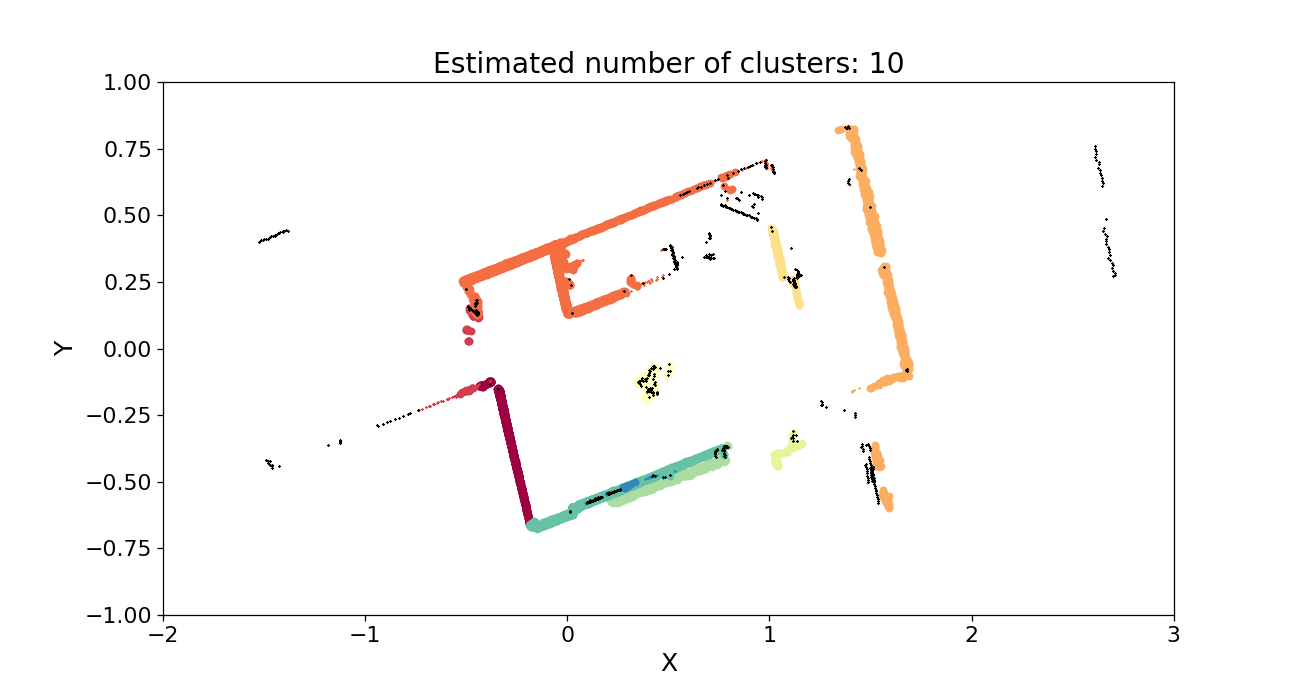

Estimated number of clusters: 10
Estimated number of noise points: 671


In [62]:
plot_xy_cluster_results(cluster_data, clustering_dbscan_eucl)

<IPython.core.display.Javascript object>


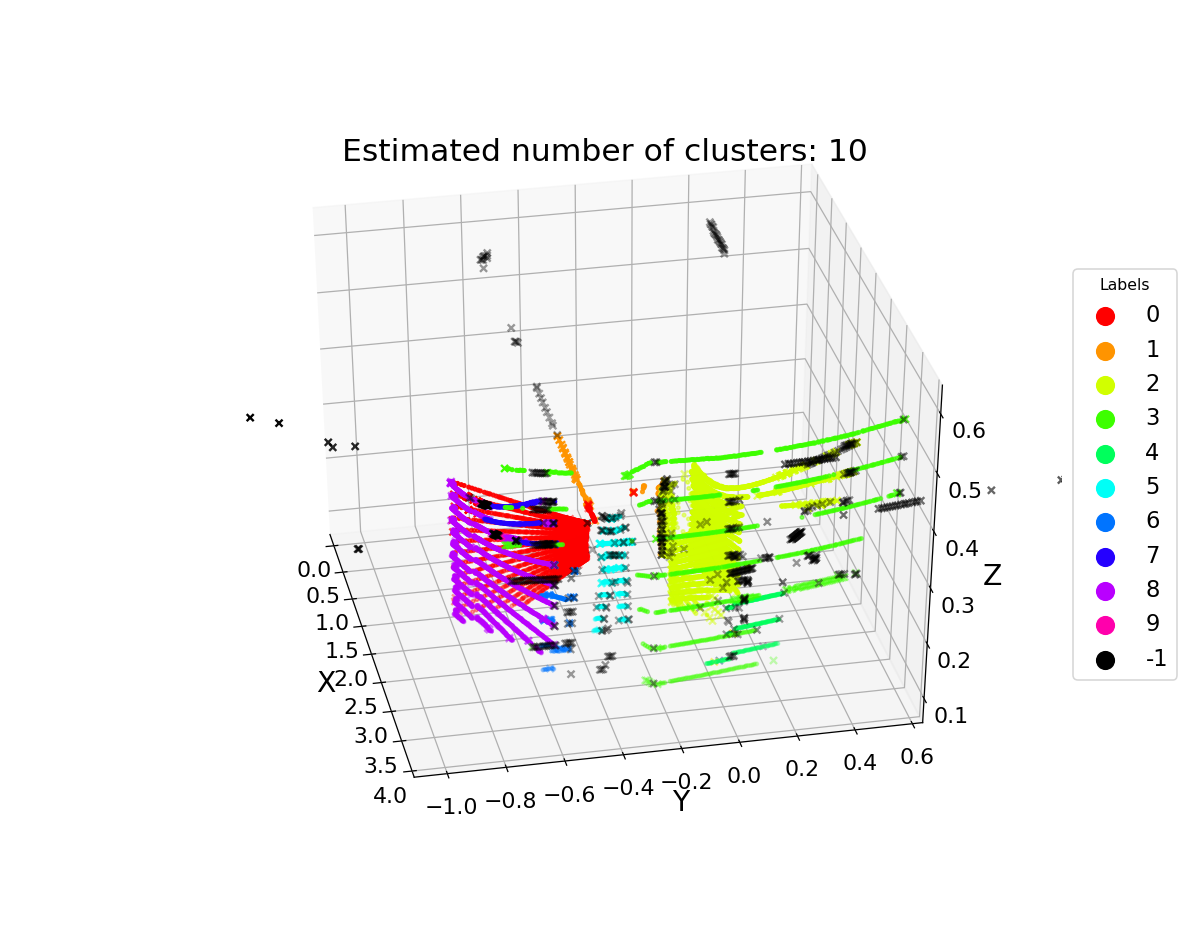

Estimated number of clusters: 10
Estimated number of noise points: 671


In [69]:
fig = plot_3d_cluster_results(cluster_data, clustering_dbscan_eucl)

In [51]:
#  DistanceMetric.get_metric('mahalanobis', V=np.cov(cluster_data))
metric = DistanceMetric.get_metric('mahalanobis', V=np.cov(cluster_data, rowvar=False))

clustering_dbscan_mahal = DBSCAN(eps=0.9, min_samples=10,  metric='mahalanobis', metric_params={'V': np.cov(cluster_data, rowvar=False)}, 
                          algorithm='brute', leaf_size=30, n_jobs=-1).fit(cluster_data)

<IPython.core.display.Javascript object>


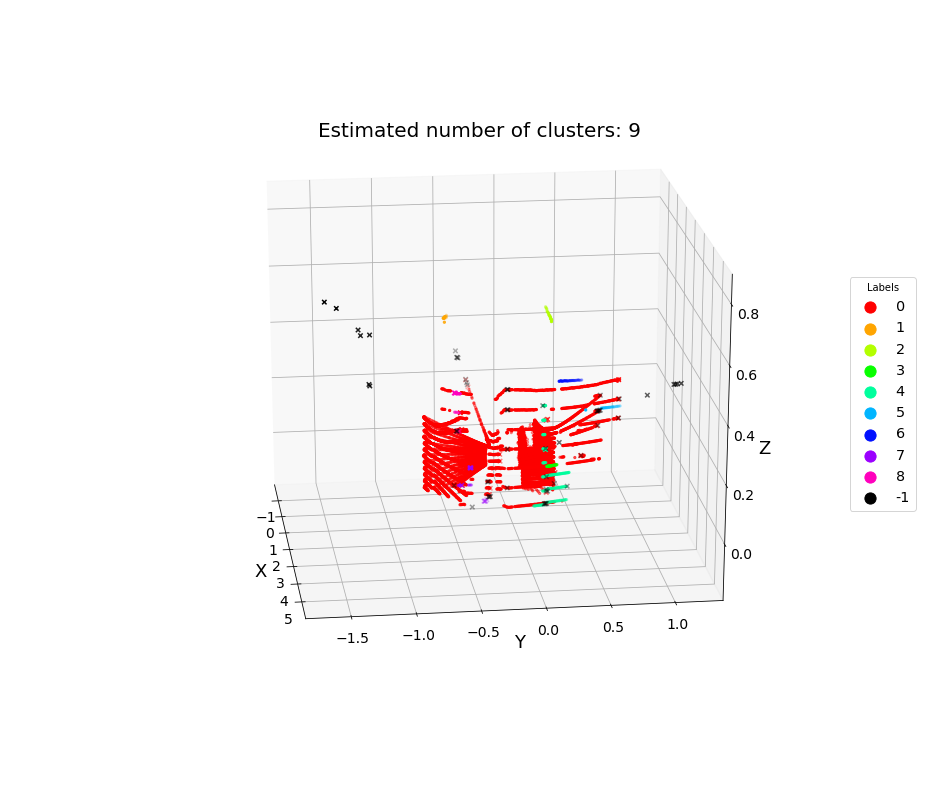

Estimated number of clusters: 9
Estimated number of noise points: 61


In [53]:
plot_3d_cluster_results(cluster_data, clustering_dbscan_mahal)

### OPTICS

In [102]:
from crowd_tracker_lidar3d.optics import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [52]:
clustering_optics = OPTICS(min_samples=100).fit(cluster_data)

In [56]:
_,_ = return_cluster_and_noise_points(clustering_optics)

Estimated number of clusters: 7
Estimated number of noise points: 5350


#### Reachability Plots

In [126]:
X = cluster_data
t0 = time.time()
# clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=5, metric='manhattan', max_eps=3)
clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)
# Run the fit
clust.fit(cluster_data)
t1 = time.time()
duration = ('%.2fs' % (t1 - t0)).lstrip('0')
print("Elapsed time: {}".format(duration))

metric= 'manhattan'
eps_ub = 0.5
eps_lb = 0.2

labels_lb = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=eps_lb)
labels_ub = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=eps_ub)

space = np.arange(len(cluster_data))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

Elapsed time: 1.00s


<IPython.core.display.Javascript object>


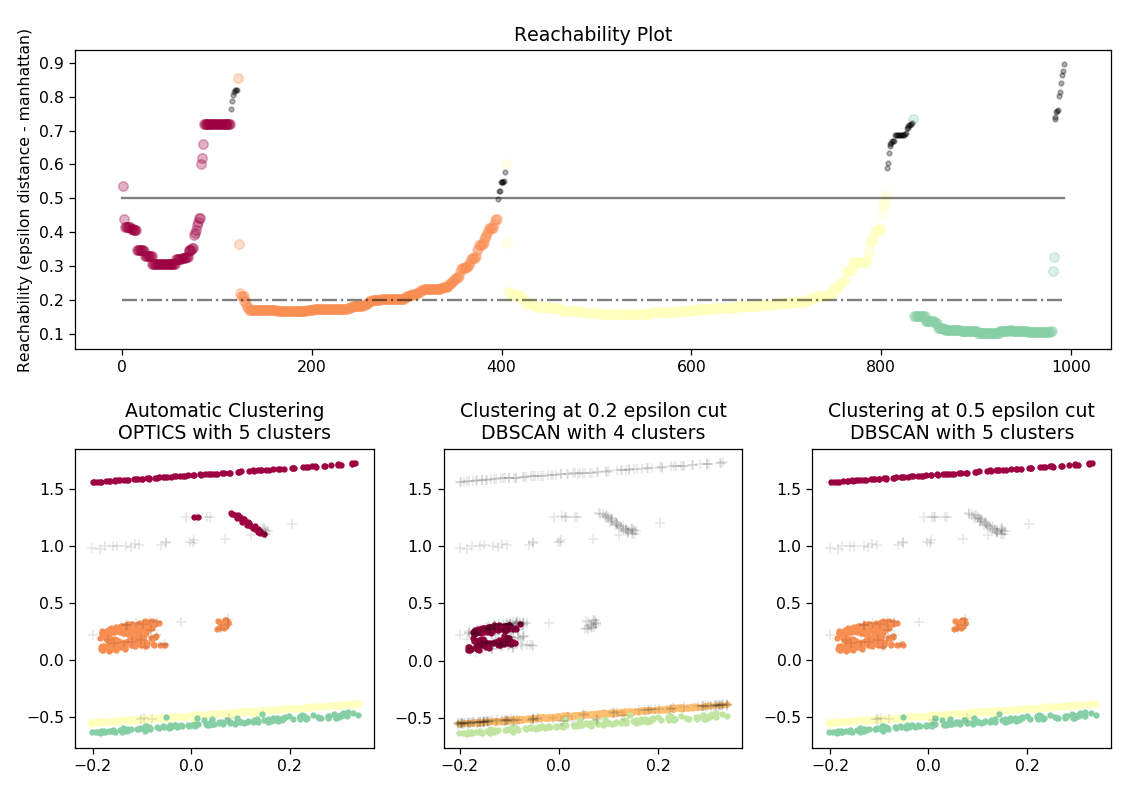

In [127]:
fig = plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# axes = [ax2, ax3, ax4]
# for ax in axes: 
#     ax.set_xlim([-1, 2])
#     ax.set_ylim([-1,1])
    
# Reachability plot
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels)))]
for klass, color in enumerate(colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.scatter(Xk, Rk, c=color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, eps_ub, dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, eps_lb, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance - {})'.format(metric))
ax1.set_title('Reachability Plot')

# OPTICS
# colors = ['g.', 'r.', 'b.', 'y.', 'c.', '.m', 'olive']
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(clust.labels_)))]
for klass, color in enumerate(colors):
    Xk = X[clust.labels_ == klass]
#     ax2.plot(Xk[:, 0], Xk[:, 1],  color, alpha=0.3)
    ax2.scatter(Xk[:, 0], Xk[:, 1],  c=color, marker='.')
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS with {} clusters'.format(len(set(clust.labels_))))

# DBSCAN at 0.5
# colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels_lb)))]
for klass, color in enumerate(colors):
    Xk = X[labels_lb == klass]
#     ax3.plot(Xk[:, 0], Xk[:, 1],  color, alpha=0.3, marker='.')
    ax3.scatter(Xk[:, 0], Xk[:, 1],  c=color, marker='.')

ax3.plot(X[labels_lb == -1, 0], X[labels_lb == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at {} epsilon cut\nDBSCAN with {} clusters'.format(eps_lb, len(set(labels_lb))))

# DBSCAN at 2.
# colors = ['g.', 'm.', 'y.', 'c.', 'r.', 'b.']
# colors = ['g.', 'r.', 'b.', 'y.', 'c.', '.m', 'olive']
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels_ub)))]
for klass, color in enumerate(colors):
    Xk = X[labels_ub == klass]
#     ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax4.scatter(Xk[:, 0], Xk[:, 1],  c=color, marker='.')

# black plus signs = outliers
ax4.plot(X[labels_ub == -1, 0], X[labels_ub == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at {} epsilon cut\nDBSCAN with {} clusters'.format(eps_ub, len(set(labels_ub))))

plt.tight_layout()
save_fig(fig, 'OPTICS_reachability_{}_v1'.format(metric))
plt.show()

In [31]:
reachabilities = clust.reachability_[clust.ordering_]
np.mean(reachabilities[np.isfinite(reachabilities)])

0.10589250678980303

### Spectral Clustering

In [29]:
from sklearn import cluster
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.manifold import spectral_embedding, SpectralEmbedding
from scipy.sparse import csgraph
from numpy import linalg as LA
from scipy.sparse.linalg import eigs

<IPython.core.display.Javascript object>


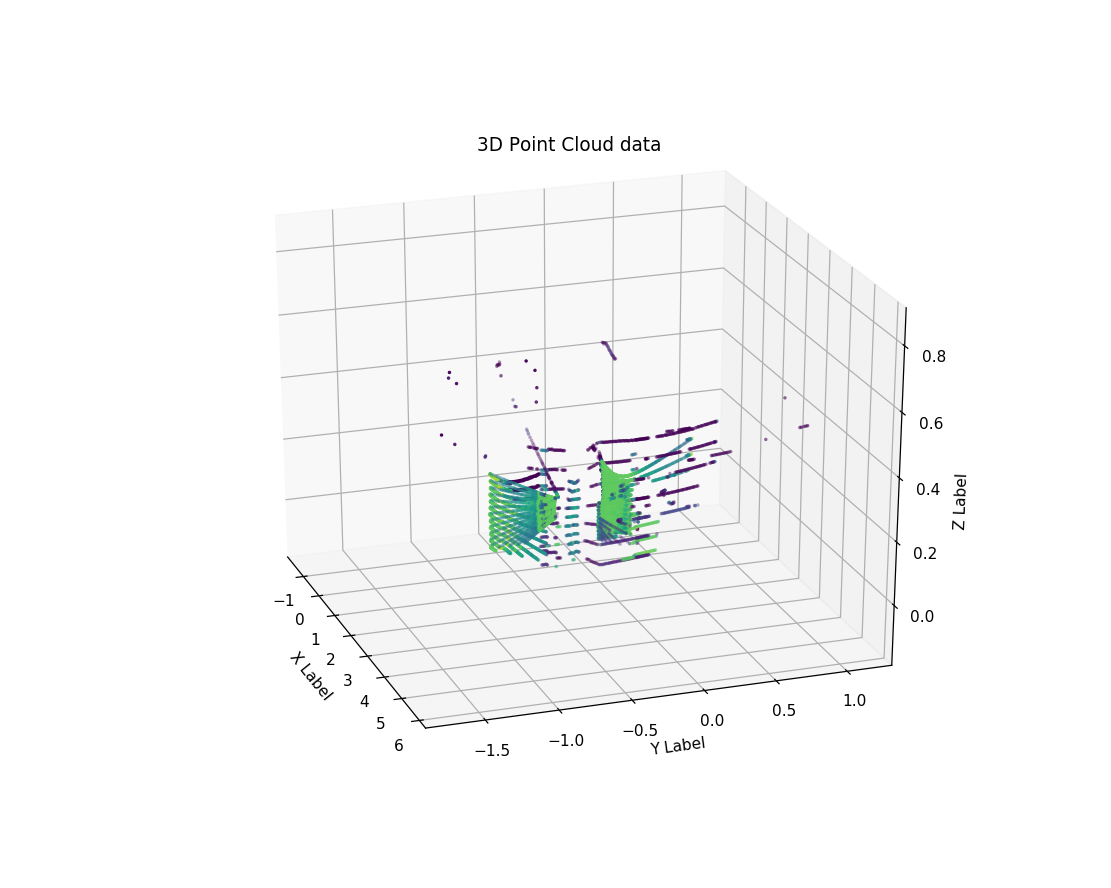

In [30]:
plot_pointcloud3d(cluster_data, point_size=1)

In [27]:
cluster_data.shape

(994, 4)

In [35]:
similarity_mat_eucl = pairwise_distances(cluster_data, metric='manhattan')

In [36]:
similarity_mat_eucl.shape

(994, 994)

In [37]:
bandwidth = cluster.estimate_bandwidth(cluster_data, quantile=.3)

In [38]:
print(bandwidth)

1.0608052563561858


In [39]:
# TODO evaluate on gamma value (now default taken)
similarity_mat_rbf = rbf_kernel(cluster_data, gamma=bandwidth)

In [43]:
# create Laplacian 
L = csgraph.laplacian(similarity_mat_eucl)
eigenvalues, eigenvectors = LA.eig(L)

In [162]:
# Alternative way to calculate eigenvalues on sparse matrices
vals, vecs = eigs(L, k=100, which='SM')

<IPython.core.display.Javascript object>


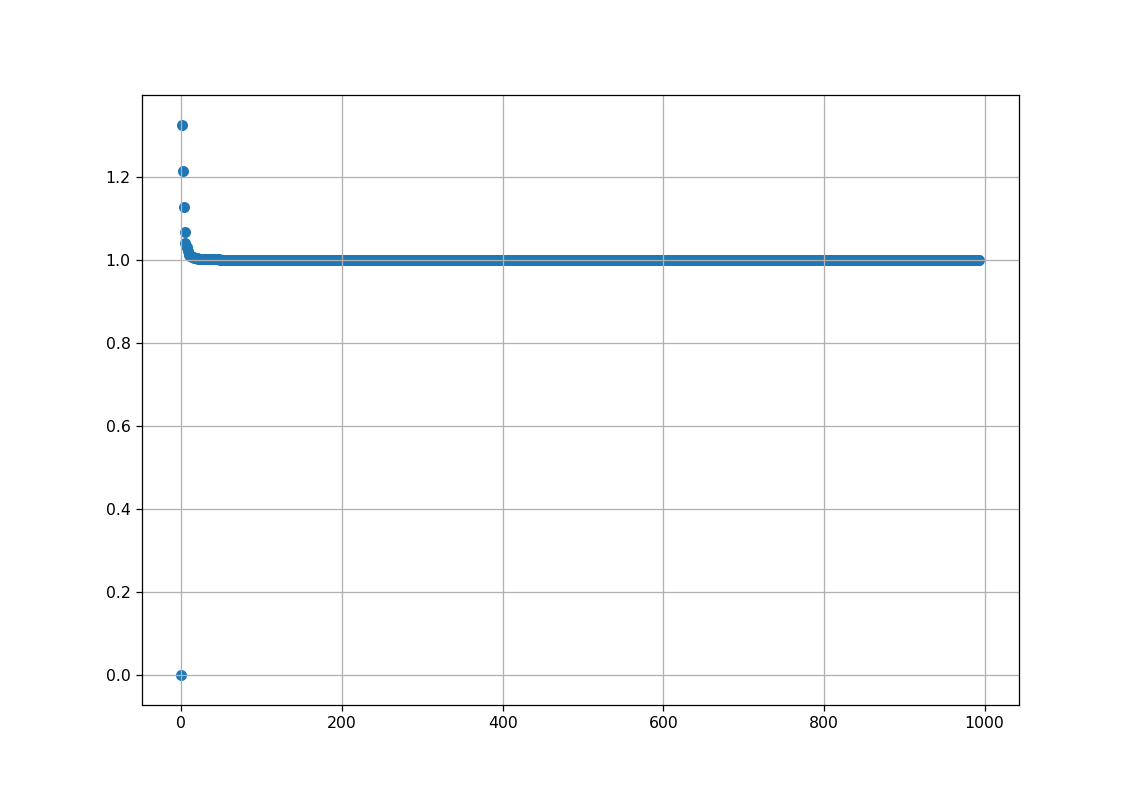

In [49]:
fig = plt.figure(figsize=[10,7])
plt.scatter(np.arange(len(eigenvalues)), eigenvalues) #s=5
plt.grid()

In [45]:
# Eigengap heuristic on normed Laplacian matrix
L = csgraph.laplacian(similarity_mat_eucl, normed=True)
eigenvalues, eigenvectors = LA.eig(L)
topK=5
index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
nb_clusters = index_largest_gap + 1
print(nb_clusters)

[  1 178 146 228  91]


In [ ]:
# Eigenvalue decomposition of Graph Laplacian
U, sigma, V = np.linalg.svd(L)

In [143]:
# Compute data embeddings 
nn_embedding = SpectralEmbedding(n_components=2, affinity = 'nearest_neighbors') #n_neighbors= (default=5)
rbf_embedding = SpectralEmbedding(n_components=2, affinity = 'rbf') #gamma=

In [150]:
cluster_data_trans = rbf_embedding.fit_transform(cluster_data)

In [151]:
# Embedding
cluster_data_trans.shape

(994, 2)

In [50]:
from sklearn import cluster
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import NearestCentroid

def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    
    centers = [kmeans.cluster_centers_]
    
    labels  = kmeans.labels_
    df = pd.DataFrame(cluster_data)
    df['cluster'] = labels
    cdf.groupby("cluster").mean()

    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object

# Spec = [SpectralClustering(n_clusters=i, affinity='rbf', gamma=bandwidth, assign_labels='kmeans').fit(cluster_data) for i in ks]
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(cluster_data) for i in ks]


# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,cluster_data) for kmeansi in KMeans]

print BIC

[-3723.064312621187, -2723.23835609498, -1935.5864590650099, -1667.9110818122765, -1244.1659399181049, -861.5783007381656, -645.7234929226415, -316.2586606339874, -165.0080642309576]


In [62]:
spectral_clustering = SpectralClustering(n_clusters=10, assign_labels="kmeans", random_state=0).fit(cluster_data)
labels = spectral_clustering.labels_

norm_data['cluster'] = labels
norm_data.groupby("cluster").mean()


# plot_3d_cluster_results(cluster_data, spectral_clustering)
# plot_xy_cluster_results(cluster_data, spectral_clustering)

x         y         z  intensity
cluster                                         
0        0.068372 -0.464449 -0.097872   0.572092
1        0.113738  1.202133 -0.066770   1.559214
2       -0.019747  1.070290 -0.126301  -1.496243
3        0.090864  1.569691  0.224095  -0.108113
4        0.070501 -0.547257  0.225846  -1.856522
5        0.012555  1.626627  0.200674   0.472543
6       -0.079360  0.242456 -0.018075  -1.526514
7       -0.123471  0.232827 -0.065237   0.322824
8       -0.144749 -0.531303 -0.013363   1.365476
9       -0.092329  0.068586  0.013642  -0.511723

[2908.43281938775, -720.034343448699, -2106.106204135382, -5542.621106379027, -6591.5946163616045, -7737.833713735534, -7888.0311111329, -7933.807231549262, -8191.092651995703, -8143.598213496702, -9181.356358564753, -8734.743037569606, -8596.285928679526, -9223.458345537832, -9683.027341048408, -9405.088957668511, -9563.979238828628, -9716.039154157887, -9749.148199395648, -9469.621400979046, -9740.020731148856, -9949.820838378952, -10115.361018209063, -9976.589005080452, -10460.000035209296, -10291.490722463637, -10098.167989581989, -10432.9491173869, -10122.795682728174]


<IPython.core.display.Javascript object>


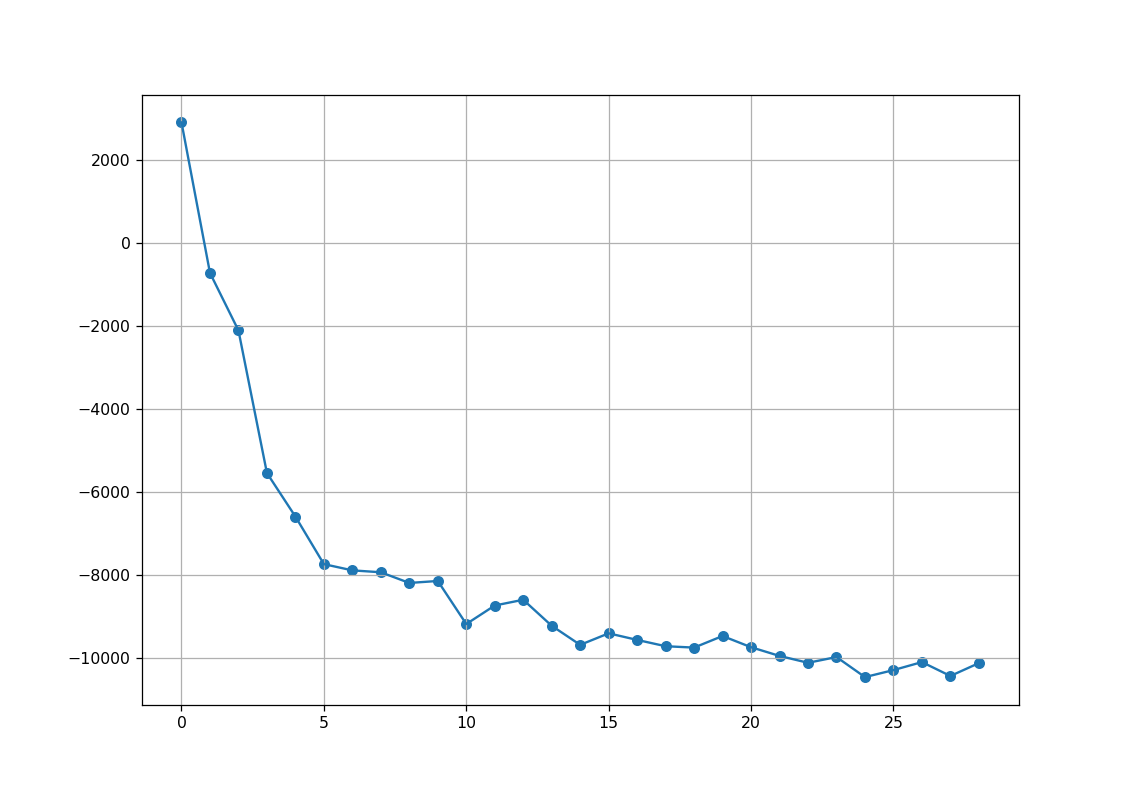

In [72]:
from sklearn.mixture import GaussianMixture


cluster_sizes = range(1,30)

# run 9 times kmeans and save each result in the KMeans object

GMM = [GaussianMixture(n_components=n_clusters, init_params='kmeans').fit(cluster_data) for n_clusters in cluster_sizes]


# now run for each cluster the BIC computation
AIC = [gmm.aic(cluster_data) for gmm in GMM]

print AIC
fig = plt.figure(figsize=[10,7])
plt.scatter(np.arange(len(AIC)), AIC) #s=5
plt.plot(np.arange(len(AIC)), AIC) #s=5
plt.grid()

In [167]:
from  sklearn.cluster import spectral_clustering 
labels = spectral_clustering(similarity_mat_rbf, n_clusters=8, n_components=6, assign_labels='kmeans')

<IPython.core.display.Javascript object>


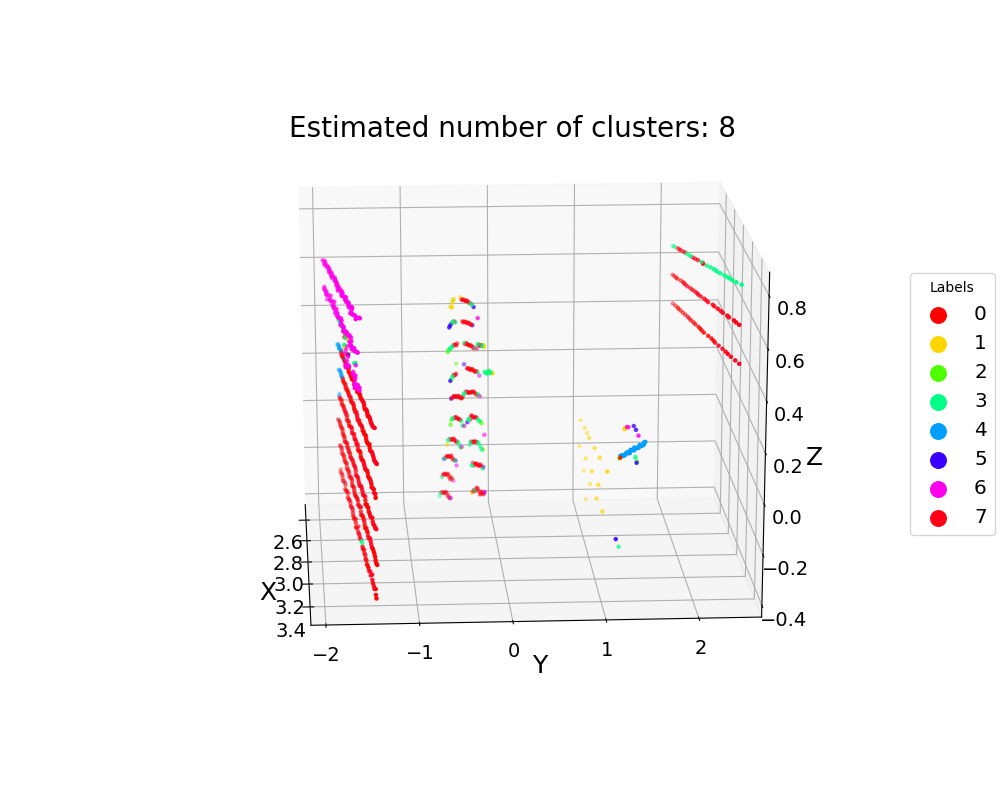

In [170]:
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(111, projection='3d')
unique_labels = set(labels)
colors = [plt.cm.hsv(each)  for each in np.linspace(0, 1, len(unique_labels))]
core_samples_mask = None 

for k, col in zip(unique_labels, colors):  
    if k == -1:    # Black used for noise.    
        col = [0, 0, 0, 1]  
    class_member_mask = (labels == k) 
    xyz = cluster_data[class_member_mask]
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=col, marker=".", label=k)

ax.set_ylabel('Y', fontsize=18)
ax.set_xlabel('X', fontsize=18)
ax.set_zlabel('Z', fontsize=18)
n_clusters_ = len(unique_labels)
ax.legend(fontsize='x-large', markerscale=5, loc='center left', bbox_to_anchor=(1, 0.5), title="Labels")
plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=20)
ax.tick_params(labelsize=14)
plt.show()

In [ ]:
from sklearn import metrics 
gammas = np.arange(0,3,0.05)
n_clusters = range(2, 20)
measures = ['euclidean', 'manhattan']
i = 1
results= collections.defaultdict(list)
for gamma in gammas: 
    for cluster_size in n_clusters: 
        print('==========================================')
        print("Round {}".format(i))
        t0 = time.time()
        clustering = SpectralClustering(n_clusters=cluster_size, affinity='rbf', gamma=gamma, assign_labels='kmeans').fit(cluster_data)            
        t1 = time.time()
        duration = ('%.2fs' % (t1 - t0)).lstrip('0')
        score = metrics.calinski_harabaz_score(cluster_data, clustering.labels_)
        results[gamma].append({'k':cluster_size,'duration': duration, 'score': score})
        i +=1

Round 1
Round 2


## Preprocessing - Testing
Testing a ground plane segmentation approach taken from [here](https://towardsdatascience.com/point-cloud-data-simple-approach-f3855fdc08f5)

In [ ]:
dataset.shape

In [ ]:
dataset[:, 2].min()

In [ ]:
def frange(start, stop, step):  
    i = start  
    while i < stop:    
        yield i    
        i += step

dataset = start_transformed[['x', 'y','z']].copy().to_numpy()

#ground points grid filter
n = 100 #grid step
dataset_Z_filtered = dataset[[0]]
print(dataset_Z_filtered)

#setting height filtered from ground
zfiltered = (dataset[:, 2].max() - dataset[:, 2].min())/10 
print('zfiltered = ', zfiltered)

xstep = (dataset[:, 0].max() - dataset[:, 0].min())/n
ystep = (dataset[:, 1].max() - dataset[:, 1].min())/n

for x in frange (dataset[:, 0].min(), dataset[:, 0].max(), xstep):  
    for y in frange (dataset[:, 1].min(), dataset[:, 1].max(), ystep):    
        datasetfiltered = dataset[(dataset[:,0] > x)
                                 &(dataset[:, 0] < x+xstep)
                                 &(dataset[:, 1] > y)
                                 &(dataset[:, 1] < y+ystep)]    
        if datasetfiltered.shape[0] > 0:      
            datasetfiltered = datasetfiltered[datasetfiltered[:, 2]
                                >(datasetfiltered[:, 2].min()+ zfiltered)]      
            if datasetfiltered.shape[0] > 0:        
                dataset_Z_filtered = np.concatenate((dataset_Z_filtered, datasetfiltered))

print('dataset_Z_filtered shape', dataset_Z_filtered.shape)

In [ ]:
import pandas as pd
df_filter = pd.DataFrame(dataset_Z_filtered, columns=['x', 'y', 'z'])

## Visualizations

### 3D Plot using matplotlib

In [ ]:
%matplotlib notebook

In [ ]:
plot_pointcloud3d(start)

### 3D Plot using pptk
See documentation [here](https://heremaps.github.io/pptk/index.html). 
Example screenshot of interactive 3D visualzation:
<img src="files/pcl_1585676368204491882.png">

In [ ]:
import pptk

In [ ]:
v = pptk.viewer(start[['x', 'y', 'z']]) 
v.attributes(start['intensity'])
v.set(point_size=0.001)

In [ ]:
v.capture('/home/brudermueller/Downloads/pcl_{}.png'.format(str(timesteps[0])))

In [ ]:
len(timesteps)

In [ ]:
# take only every 40th timestep
subsample = timesteps[::40]

In [ ]:
len(subsample)

In [ ]:
pcl = data[data.rosbagTimestamp == timesteps[150]].reset_index()
pcl = df_apply_rot(pcl)
pcl = remove_ground_points(pcl, -0.38)
pcl.head()
pcl = pcl[(pcl.x.between(2.9, 3.5)) & (pcl.y.between(-1, 2))]
v = pptk.viewer(pcl[['x', 'y', 'z']]) 
v.attributes(pcl['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=7)   

In [ ]:
# save screenshot of lidar 3D plot for each timestep 
import time
for i,t in enumerate(timesteps[15:-1]): 
    pcl = data[data.rosbagTimestamp == t].reset_index()
    pcl = df_apply_rot(pcl)
    pcl = remove_ground_points(pcl, -0.38)
    pcl = pcl[(pcl.x.between(2.9, 3.5)) & (pcl.y.between(-1, 2))]
    v = pptk.viewer(pcl[['x', 'y', 'z']]) 
    v.attributes(pcl['intensity'])
    v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=8)    
    time.sleep(2)
    v.capture('/home/brudermueller/Downloads/{}m_pcl_groundtruth_{}.png'.format(str(walking_dist),i))
    time.sleep(2)
    v.close()

In [ ]:
v = pptk.viewer(start_ground[['x', 'y', 'z']]) 
v.attributes(start_ground['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)

In [ ]:
v = pptk.viewer(start[['x', 'y', 'z']]) 
v.attributes(start['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)